In [15]:
import warnings
warnings.filterwarnings('ignore')

# Prepare the Dataset

In [17]:
dataset_name = 'SmallNorb_Full_dataset'

In [18]:
import tensorflow_datasets as tfds

In [19]:
import utils.datasetLoaderFromTFDS as datas
d1 = datas.DatasetLoader()

AttributeError: module 'utils.datasetLoaderFromTFDS' has no attribute 'DatasetLoader'

In [20]:
import utils.datasetLoaderFromTFDS as datas

datas.giveDatasetInfo('smallnorb')
X , y =datas.loadDataset('smallnorb',48600)
print('Dataset size {}'.format(X.shape))
print('Labes size {}'.format(y.shape))

tfds.core.DatasetInfo(
    name='smallnorb',
    version=0.1.0,
    description='\
This database is intended for experiments in 3D object recognition from shape. It contains images of 50 toys belonging to 5 generic categories: four-legged animals, human figures, airplanes, trucks, and cars. The objects were imaged by two cameras under 6 lighting conditions, 9 elevations (30 to 70 degrees every 5 degrees), and 18 azimuths (0 to 340 every 20 degrees).

The training set is composed of 5 instances of each category (instances 4, 6, 7, 8 and 9), and the test set of the remaining 5 instances (instances 0, 1, 2, 3, and 5).
',
    urls=['https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/'],
    features=FeaturesDict({
        'image': Image(shape=(96, 96, 1), dtype=tf.uint8),
        'image2': Image(shape=(96, 96, 1), dtype=tf.uint8),
        'instance': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
        'label_azimuth': ClassLabel(shape=(), dtype=tf.int64, num_classes=18),
        'la

In [21]:
datas.save_to_npz('smallnorb',X,y)

Started Saving arrays to npz
Finished Saving arrays to npz


In [6]:
datas.load_from_npz('smallnorb')

Started loading arrays from npz
Finished loading arrays from npz


(array([[[[223],
          [223],
          [223],
          ...,
          [223],
          [223],
          [223]],
 
         [[223],
          [223],
          [223],
          ...,
          [223],
          [223],
          [223]],
 
         [[223],
          [223],
          [223],
          ...,
          [223],
          [223],
          [223]],
 
         ...,
 
         [[223],
          [223],
          [223],
          ...,
          [223],
          [223],
          [223]],
 
         [[223],
          [223],
          [223],
          ...,
          [223],
          [223],
          [223]],
 
         [[223],
          [223],
          [223],
          ...,
          [223],
          [223],
          [223]]],
 
 
        [[[223],
          [223],
          [223],
          ...,
          [223],
          [223],
          [223]],
 
         [[223],
          [223],
          [223],
          ...,
          [223],
          [223],
          [223]],
 
         [[223],
    

In [7]:
!pip install b

  Stored in directory: C:\Users\AzeGhost\AppData\Local\pip\Cache\wheels\fa\d2\9a\d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [5]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import os
g_login = GoogleAuth()
g_login.LocalWebserverAuth()
drive = GoogleDrive(g_login)

InvalidConfigError: Invalid client secrets file ('Error opening file', 'client_secrets.json', 'No such file or directory', 2)

In [7]:
tfds.list_builders()

['abstract_reasoning',
 'bair_robot_pushing_small',
 'caltech101',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_corrupted',
 'cnn_dailymail',
 'coco2014',
 'colorectal_histology',
 'colorectal_histology_large',
 'cycle_gan',
 'diabetic_retinopathy_detection',
 'dsprites',
 'dtd',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'fashion_mnist',
 'flores',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'image_label_folder',
 'imagenet2012',
 'imagenet2012_corrupted',
 'imdb_reviews',
 'iris',
 'kmnist',
 'lm1b',
 'lsun',
 'mnist',
 'moving_mnist',
 'multi_nli',
 'nsynth',
 'omniglot',
 'open_images_v4',
 'oxford_flowers102',
 'oxford_iiit_pet',
 'para_crawl',
 'quickdraw_bitmap',
 'rock_paper_scissors',
 'shapes3d',
 'smallnorb',
 'squad',
 'starcraft_video',
 'sun397',
 'svhn_cropped',
 'ted_hrlr_translate',
 'ted_multi_translate',
 'tf_flowers',
 'titanic',
 'ucf101',
 'voc2007',
 'wikipedia',
 'wmt15_translate',
 'wmt1

In [ ]:
import numpy as np
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X, X_test))
y = np.concatenate((y, y_test))
imgs = X
del X_test
del y_test

print('Dataset size {}'.format(X.shape))

# AE

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from utils.constants import Models as models
from models.AE import AE

In [24]:
ae = AE(model_type=models.VAE, dataset_name=dataset_name,hidden_dim=500, plot=True, isConv=False)

Unable to load previous configuration ...
Saving Model Arguments ...



Processing data...
(48600, 96, 96, 1)
Scaling dataset ... 
Creating dask array ... 
Preparing samples ...


W0816 23:04:43.213598  3836 _split.py:454] Mixture of types in 'arrays'. Falling back to scikit-learn.


Training dataset shape:  (38880, 96, 96, 1)
Validation dataset shape:  (9720, 96, 96, 1)
Sample dataset shape:  (100, 96, 96, 1)
building VAE graph ... 

[*] Defining encoders...

[*] Layer ( encoder_mean/enmean_dense_1/Relu:0 ) output shape: [64, 500]
[*] Layer ( encoder_mean/enmean_dense_1_dropout/Identity:0 ) output shape: [64, 500]
[*] Layer ( encoder_mean/enmean_dense_2/Relu:0 ) output shape: [64, 500]
[*] Layer ( encoder_mean/enmean_dense_2_dropout/Identity:0 ) output shape: [64, 500]
[*] Layer ( encoder_mean/enmean_H2_batch_norm/batchnorm/add_1:0 ) output shape: [64, 500]
[*] Layer ( encoder_mean/enmean_dense_3/BiasAdd:0 ) output shape: [64, 5]

[*] Layer ( encoder_var/envar_dense_1/Relu:0 ) output shape: [64, 500]
[*] Layer ( encoder_var/envar_dense_1_dropout/Identity:0 ) output shape: [64, 500]
[*] Layer ( encoder_var/envar_dense_2/Relu:0 ) output shape: [64, 500]
[*] Layer ( encoder_var/envar_dense_2_dropout/Identity:0 ) output shape: [64, 500]
[*] Layer ( encoder_var/envar_H

100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 14.93it/s]


TRAIN: 
VAE: 4487.031 | AE: 4462.08 | reconstruction: 4462.0757 | L2: 3258.3352 | 
EVALUATE: 
VAE: 4381.5283 | AE: 4366.72 | reconstruction: 4366.717 | L2: 3679.256 | 

EPOCH:  1


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.65it/s]


TRAIN: 
VAE: 4392.7725 | AE: 4379.371 | reconstruction: 4379.368 | L2: 3794.837 | 
EVALUATE: 
VAE: 4366.8433 | AE: 4355.0713 | reconstruction: 4355.067 | L2: 3903.4995 | 

Saving model...
Model saved
Generating latent space ...
(38880, 96, 96, 1)
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-1214 ...

Model loaded
EPOCHS trained:  1


608it [00:04, 132.78it/s]                                                                                              


Latent space dimensions: (38880, 2)
Plotting latent space ...
data size (38880, 2)


100%|██████████████████████████████████████████████████████████████████████████| 38880/38880 [00:11<00:00, 3294.63it/s]


Saving Image experiments/log_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/VAE__SmallNorb_Full_dataset_lat5_h500_lay3 latent epoch 1.jpg ...
latent space dimensions: (38880, 3)
Plotting latent space ...
data size (38880, 3)


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 147.00it/s]


Saving Image experiments/log_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/VAE__SmallNorb_Full_dataset_lat5_h500_lay3 latent_3d epoch 1.jpg ...
Reconstructing samples from Data ...
(100, 96, 96, 1)
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-1214 ...

Model loaded
EPOCHS trained:  1


2it [00:00, 29.40it/s]                                                                                                 


Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-1214 ...

Model loaded
EPOCHS trained:  1


2it [00:00, 66.56it/s]                                                                                                 


Saving Image  experiments/log_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/VAE__SmallNorb_Full_dataset_lat5_h500_lay3 samples reconstruction epoch 1.jpg
EPOCH:  2


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:10<00:00, 14.37it/s]


TRAIN: 
VAE: 4363.754 | AE: 4349.3247 | reconstruction: 4349.3203 | L2: 4087.7834 | 
EVALUATE: 
VAE: 4338.7397 | AE: 4325.557 | reconstruction: 4325.5537 | L2: 4251.832 | 

EPOCH:  3


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.72it/s]


TRAIN: 
VAE: 4361.1777 | AE: 4347.3486 | reconstruction: 4347.3438 | L2: 4292.602 | 
EVALUATE: 
VAE: 4337.7524 | AE: 4324.7485 | reconstruction: 4324.7446 | L2: 4409.0864 | 

EPOCH:  4


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 16.39it/s]


TRAIN: 
VAE: 4350.7485 | AE: 4338.28 | reconstruction: 4338.2754 | L2: 4597.8643 | 
EVALUATE: 
VAE: 4334.5396 | AE: 4322.7964 | reconstruction: 4322.7925 | L2: 4800.143 | 

EPOCH:  5


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.91it/s]


TRAIN: 
VAE: 4349.8003 | AE: 4338.7593 | reconstruction: 4338.7534 | L2: 4944.146 | 
EVALUATE: 
VAE: 4329.5493 | AE: 4319.235 | reconstruction: 4319.2295 | L2: 5045.9946 | 

EPOCH:  6


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.84it/s]


TRAIN: 
VAE: 4344.3193 | AE: 4332.9272 | reconstruction: 4332.9214 | L2: 5184.9424 | 
EVALUATE: 
VAE: 4329.167 | AE: 4317.0737 | reconstruction: 4317.0674 | L2: 5313.5015 | 

EPOCH:  7


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 16.21it/s]


TRAIN: 
VAE: 4337.9355 | AE: 4325.4756 | reconstruction: 4325.471 | L2: 5406.8755 | 
EVALUATE: 
VAE: 4314.8296 | AE: 4300.7266 | reconstruction: 4300.7217 | L2: 5562.371 | 

EPOCH:  8


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.73it/s]


TRAIN: 
VAE: 4329.7964 | AE: 4317.093 | reconstruction: 4317.0884 | L2: 5763.2246 | 
EVALUATE: 
VAE: 4315.4575 | AE: 4302.3696 | reconstruction: 4302.3633 | L2: 5969.795 | 

total loss Patience count:  1
EPOCH:  9


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 16.20it/s]


TRAIN: 
VAE: 4330.9136 | AE: 4318.1475 | reconstruction: 4318.1426 | L2: 6072.568 | 
EVALUATE: 
VAE: 4313.5938 | AE: 4301.111 | reconstruction: 4301.1055 | L2: 6204.579 | 

EPOCH:  10


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 16.30it/s]


TRAIN: 
VAE: 4327.691 | AE: 4314.902 | reconstruction: 4314.8965 | L2: 6367.1006 | 
EVALUATE: 
VAE: 4311.199 | AE: 4298.864 | reconstruction: 4298.8584 | L2: 6544.1377 | 

EPOCH:  11


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:10<00:00, 14.99it/s]


TRAIN: 
VAE: 4327.72 | AE: 4314.906 | reconstruction: 4314.897 | L2: 6651.397 | 
EVALUATE: 
VAE: 4306.994 | AE: 4293.583 | reconstruction: 4293.577 | L2: 6818.203 | 

EPOCH:  12


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:10<00:00, 14.36it/s]


TRAIN: 
VAE: 4324.8574 | AE: 4311.9644 | reconstruction: 4311.958 | L2: 6991.5273 | 
EVALUATE: 
VAE: 4307.7217 | AE: 4294.593 | reconstruction: 4294.587 | L2: 7179.048 | 

total loss Patience count:  1
EPOCH:  13


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 16.39it/s]


TRAIN: 
VAE: 4328.073 | AE: 4315.2026 | reconstruction: 4315.1963 | L2: 7178.276 | 
EVALUATE: 
VAE: 4313.5903 | AE: 4300.614 | reconstruction: 4300.6074 | L2: 7314.069 | 

total loss Patience count:  2
EPOCH:  14


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.60it/s]


TRAIN: 
VAE: 4326.646 | AE: 4313.7324 | reconstruction: 4313.7236 | L2: 7438.9556 | 
EVALUATE: 
VAE: 4306.0894 | AE: 4293.619 | reconstruction: 4293.613 | L2: 7593.736 | 

EPOCH:  15


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.82it/s]


TRAIN: 
VAE: 4322.596 | AE: 4309.6953 | reconstruction: 4309.6846 | L2: 7700.0435 | 
EVALUATE: 
VAE: 4304.8706 | AE: 4292.4927 | reconstruction: 4292.486 | L2: 7878.917 | 

EPOCH:  16


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.13it/s]


TRAIN: 
VAE: 4323.568 | AE: 4310.588 | reconstruction: 4310.58 | L2: 7983.94 | 
EVALUATE: 
VAE: 4305.822 | AE: 4292.5776 | reconstruction: 4292.5684 | L2: 8142.237 | 

total loss Patience count:  1
EPOCH:  17


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 16.12it/s]


TRAIN: 
VAE: 4323.374 | AE: 4310.3535 | reconstruction: 4310.344 | L2: 8252.524 | 
EVALUATE: 
VAE: 4326.769 | AE: 4312.5015 | reconstruction: 4312.492 | L2: 8359.914 | 

total loss Patience count:  2
EPOCH:  18


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 16.34it/s]


TRAIN: 
VAE: 4324.854 | AE: 4311.814 | reconstruction: 4311.8013 | L2: 8423.384 | 
EVALUATE: 
VAE: 4305.2607 | AE: 4291.8506 | reconstruction: 4291.842 | L2: 8579.916 | 

total loss Patience count:  3
EPOCH:  19


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.87it/s]


TRAIN: 
VAE: 4322.529 | AE: 4309.402 | reconstruction: 4309.3926 | L2: 8715.858 | 
EVALUATE: 
VAE: 4303.559 | AE: 4291.0776 | reconstruction: 4291.0674 | L2: 8910.749 | 

EPOCH:  20


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.18it/s]


TRAIN: 
VAE: 4321.267 | AE: 4308.0967 | reconstruction: 4308.0864 | L2: 9037.596 | 
EVALUATE: 
VAE: 4307.423 | AE: 4294.362 | reconstruction: 4294.354 | L2: 9210.738 | 

Saving model...
Model saved
Generating latent space ...
(38880, 96, 96, 1)
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-12747 ...

Model loaded
EPOCHS trained:  20


608it [00:04, 127.49it/s]                                                                                              


Latent space dimensions: (38880, 2)
Plotting latent space ...
data size (38880, 2)


100%|██████████████████████████████████████████████████████████████████████████| 38880/38880 [00:14<00:00, 2625.78it/s]


Saving Image experiments/log_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/VAE__SmallNorb_Full_dataset_lat5_h500_lay3 latent epoch 20.jpg ...
latent space dimensions: (38880, 3)
Plotting latent space ...
data size (38880, 3)


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 142.90it/s]


Saving Image experiments/log_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/VAE__SmallNorb_Full_dataset_lat5_h500_lay3 latent_3d epoch 20.jpg ...
Reconstructing samples from Data ...
(100, 96, 96, 1)
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-12747 ...

Model loaded
EPOCHS trained:  20


2it [00:00, 20.62it/s]                                                                                                 


Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-12747 ...

Model loaded
EPOCHS trained:  20


2it [00:00, 57.14it/s]                                                                                                 


Saving Image  experiments/log_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/VAE__SmallNorb_Full_dataset_lat5_h500_lay3 samples reconstruction epoch 20.jpg
total loss Patience count:  1
EPOCH:  21


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.44it/s]


TRAIN: 
VAE: 4321.5464 | AE: 4308.381 | reconstruction: 4308.3726 | L2: 9344.334 | 
EVALUATE: 
VAE: 4310.248 | AE: 4296.726 | reconstruction: 4296.7153 | L2: 9577.261 | 

total loss Patience count:  2
EPOCH:  22


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:08<00:00, 17.04it/s]


TRAIN: 
VAE: 4323.511 | AE: 4310.1987 | reconstruction: 4310.191 | L2: 9673.348 | 
EVALUATE: 
VAE: 4303.742 | AE: 4290.4893 | reconstruction: 4290.481 | L2: 9756.333 | 

total loss Patience count:  3
EPOCH:  23


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:08<00:00, 17.42it/s]


TRAIN: 
VAE: 4320.2314 | AE: 4306.871 | reconstruction: 4306.8613 | L2: 9938.591 | 
EVALUATE: 
VAE: 4335.641 | AE: 4322.3457 | reconstruction: 4322.3335 | L2: 10131.761 | 

total loss Patience count:  4
EPOCH:  24


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 16.50it/s]


TRAIN: 
VAE: 4323.4937 | AE: 4310.1646 | reconstruction: 4310.154 | L2: 10236.04 | 
EVALUATE: 
VAE: 4301.202 | AE: 4287.405 | reconstruction: 4287.393 | L2: 10380.157 | 

EPOCH:  25


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 16.10it/s]


TRAIN: 
VAE: 4318.968 | AE: 4305.558 | reconstruction: 4305.547 | L2: 10560.712 | 
EVALUATE: 
VAE: 4306.1157 | AE: 4293.198 | reconstruction: 4293.189 | L2: 10786.115 | 

total loss Patience count:  1
EPOCH:  26


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 16.30it/s]


TRAIN: 
VAE: 4320.0356 | AE: 4306.6035 | reconstruction: 4306.592 | L2: 10901.042 | 
EVALUATE: 
VAE: 4301.33 | AE: 4287.68 | reconstruction: 4287.6694 | L2: 11113.961 | 

total loss Patience count:  2
EPOCH:  27


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:08<00:00, 16.85it/s]


TRAIN: 
VAE: 4320.8525 | AE: 4307.3433 | reconstruction: 4307.33 | L2: 11233.075 | 
EVALUATE: 
VAE: 4307.833 | AE: 4293.484 | reconstruction: 4293.4727 | L2: 11406.16 | 

total loss Patience count:  3
EPOCH:  28


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 16.43it/s]


TRAIN: 
VAE: 4319.183 | AE: 4305.5835 | reconstruction: 4305.5728 | L2: 11581.442 | 
EVALUATE: 
VAE: 4309.717 | AE: 4295.7197 | reconstruction: 4295.7075 | L2: 11816.376 | 

total loss Patience count:  4
EPOCH:  29


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:11<00:00, 13.44it/s]


TRAIN: 
VAE: 4319.7466 | AE: 4306.183 | reconstruction: 4306.1724 | L2: 11939.15 | 
EVALUATE: 
VAE: 4302.496 | AE: 4289.1577 | reconstruction: 4289.144 | L2: 12109.215 | 

total loss Patience count:  5
EPOCH:  30


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.90it/s]


TRAIN: 
VAE: 4320.1973 | AE: 4306.6245 | reconstruction: 4306.612 | L2: 12214.639 | 
EVALUATE: 
VAE: 4311.0967 | AE: 4297.6133 | reconstruction: 4297.6016 | L2: 12349.384 | 

total loss Patience count:  6
EPOCH:  31


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.58it/s]


TRAIN: 
VAE: 4319.2354 | AE: 4305.5728 | reconstruction: 4305.563 | L2: 12490.227 | 
EVALUATE: 
VAE: 4305.827 | AE: 4291.363 | reconstruction: 4291.348 | L2: 12649.133 | 

total loss Patience count:  7
EPOCH:  32


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 16.23it/s]


TRAIN: 
VAE: 4319.6963 | AE: 4306.0723 | reconstruction: 4306.0576 | L2: 12804.054 | 
EVALUATE: 
VAE: 4300.069 | AE: 4286.994 | reconstruction: 4286.9805 | L2: 13005.031 | 

EPOCH:  33


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.11it/s]


TRAIN: 
VAE: 4317.954 | AE: 4304.252 | reconstruction: 4304.2407 | L2: 13171.182 | 
EVALUATE: 
VAE: 4303.3955 | AE: 4289.5977 | reconstruction: 4289.586 | L2: 13368.372 | 

total loss Patience count:  1
EPOCH:  34


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.14it/s]


TRAIN: 
VAE: 4319.196 | AE: 4305.4824 | reconstruction: 4305.4688 | L2: 13522.425 | 
EVALUATE: 
VAE: 4299.7954 | AE: 4285.5186 | reconstruction: 4285.5054 | L2: 13658.226 | 

EPOCH:  35


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.97it/s]


TRAIN: 
VAE: 4319.441 | AE: 4305.72 | reconstruction: 4305.7046 | L2: 13850.909 | 
EVALUATE: 
VAE: 4301.9634 | AE: 4288.425 | reconstruction: 4288.4106 | L2: 14003.28 | 

total loss Patience count:  1
EPOCH:  36


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.73it/s]


TRAIN: 
VAE: 4318.238 | AE: 4304.4985 | reconstruction: 4304.4844 | L2: 14118.275 | 
EVALUATE: 
VAE: 4301.22 | AE: 4286.9717 | reconstruction: 4286.958 | L2: 14295.748 | 

total loss Patience count:  2
EPOCH:  37


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.87it/s]


TRAIN: 
VAE: 4318.575 | AE: 4304.8003 | reconstruction: 4304.7856 | L2: 14479.559 | 
EVALUATE: 
VAE: 4314.554 | AE: 4300.8213 | reconstruction: 4300.806 | L2: 14602.889 | 

total loss Patience count:  3
EPOCH:  38


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 14.87it/s]


TRAIN: 
VAE: 4320.331 | AE: 4306.573 | reconstruction: 4306.5576 | L2: 14771.777 | 
EVALUATE: 
VAE: 4299.9453 | AE: 4286.738 | reconstruction: 4286.7236 | L2: 14889.752 | 

total loss Patience count:  4
EPOCH:  39


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.29it/s]


TRAIN: 
VAE: 4317.958 | AE: 4304.173 | reconstruction: 4304.157 | L2: 15018.657 | 
EVALUATE: 
VAE: 4303.4785 | AE: 4289.0386 | reconstruction: 4289.024 | L2: 15179.657 | 

total loss Patience count:  5
EPOCH:  40


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:09<00:00, 15.16it/s]


TRAIN: 
VAE: 4317.4165 | AE: 4303.617 | reconstruction: 4303.6006 | L2: 15310.173 | 
EVALUATE: 
VAE: 4307.9736 | AE: 4294.3833 | reconstruction: 4294.368 | L2: 15513.778 | 

Saving model...
Model saved
Generating latent space ...
(38880, 96, 96, 1)
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-24887 ...

Model loaded
EPOCHS trained:  40


608it [00:04, 130.47it/s]                                                                                              


Latent space dimensions: (38880, 2)
Plotting latent space ...
data size (38880, 2)


100%|██████████████████████████████████████████████████████████████████████████| 38880/38880 [00:16<00:00, 2353.99it/s]


Saving Image experiments/log_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/VAE__SmallNorb_Full_dataset_lat5_h500_lay3 latent epoch 40.jpg ...
latent space dimensions: (38880, 3)
Plotting latent space ...
data size (38880, 3)


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 151.38it/s]


Saving Image experiments/log_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/VAE__SmallNorb_Full_dataset_lat5_h500_lay3 latent_3d epoch 40.jpg ...
Reconstructing samples from Data ...
(100, 96, 96, 1)
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-24887 ...

Model loaded
EPOCHS trained:  40


2it [00:00, 26.66it/s]                                                                                                 


Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-24887 ...

Model loaded
EPOCHS trained:  40


2it [00:00, 57.14it/s]                                                                                                 


Saving Image  experiments/log_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/VAE__SmallNorb_Full_dataset_lat5_h500_lay3 samples reconstruction epoch 40.jpg
total loss Patience count:  6
EPOCH:  41


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:10<00:00, 14.59it/s]


TRAIN: 
VAE: 4323.3936 | AE: 4309.633 | reconstruction: 4309.6177 | L2: 15828.666 | 
EVALUATE: 
VAE: 4304.655 | AE: 4291.2563 | reconstruction: 4291.2407 | L2: 16221.498 | 

total loss Patience count:  7
EPOCH:  42


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:08<00:00, 17.61it/s]


TRAIN: 
VAE: 4319.6455 | AE: 4305.988 | reconstruction: 4305.9707 | L2: 16494.037 | 
EVALUATE: 
VAE: 4306.026 | AE: 4291.216 | reconstruction: 4291.2 | L2: 16818.252 | 

total loss Patience count:  8
decaying learning rate ... 
new learning rate: 9.999999747378752e-05
EPOCH:  43


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:08<00:00, 17.95it/s]


TRAIN: 
VAE: 4318.5938 | AE: 4304.8486 | reconstruction: 4304.8325 | L2: 17000.617 | 
EVALUATE: 
VAE: 4300.9424 | AE: 4286.655 | reconstruction: 4286.6377 | L2: 17187.502 | 

total loss Patience count:  9
EPOCH:  44


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:08<00:00, 17.91it/s]


TRAIN: 
VAE: 4317.5234 | AE: 4303.728 | reconstruction: 4303.7065 | L2: 17359.873 | 
EVALUATE: 
VAE: 4300.6396 | AE: 4286.1553 | reconstruction: 4286.139 | L2: 17520.344 | 

total loss Patience count:  10
EPOCH:  45


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:08<00:00, 17.67it/s]


TRAIN: 
VAE: 4325.6304 | AE: 4311.937 | reconstruction: 4311.92 | L2: 17553.463 | 
EVALUATE: 
VAE: 4300.7046 | AE: 4287.0337 | reconstruction: 4287.0176 | L2: 17594.477 | 

total loss Patience count:  11
EPOCH:  46


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:08<00:00, 18.06it/s]


TRAIN: 
VAE: 4317.481 | AE: 4303.659 | reconstruction: 4303.641 | L2: 17731.89 | 
EVALUATE: 
VAE: 4305.0054 | AE: 4290.7783 | reconstruction: 4290.762 | L2: 17893.756 | 

total loss Patience count:  12
EPOCH:  47


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:08<00:00, 17.45it/s]


TRAIN: 
VAE: 4317.175 | AE: 4303.35 | reconstruction: 4303.332 | L2: 17984.078 | 
EVALUATE: 
VAE: 4300.4453 | AE: 4286.364 | reconstruction: 4286.3447 | L2: 18084.578 | 

total loss Patience count:  13
EPOCH:  48


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:08<00:00, 18.28it/s]


TRAIN: 
VAE: 4317.1377 | AE: 4303.2617 | reconstruction: 4303.243 | L2: 18230.24 | 
EVALUATE: 
VAE: 4301.9585 | AE: 4287.316 | reconstruction: 4287.299 | L2: 18372.93 | 

total loss Patience count:  14
EPOCH:  49


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:08<00:00, 18.15it/s]


TRAIN: 
VAE: 4317.2886 | AE: 4303.3896 | reconstruction: 4303.3726 | L2: 18520.111 | 
EVALUATE: 
VAE: 4311.148 | AE: 4297.3145 | reconstruction: 4297.296 | L2: 18700.018 | 

total loss Patience count:  15
EPOCH:  50


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:08<00:00, 17.79it/s]


TRAIN: 
VAE: 4317.1724 | AE: 4303.244 | reconstruction: 4303.2266 | L2: 18811.486 | 
EVALUATE: 
VAE: 4309.858 | AE: 4294.9 | reconstruction: 4294.882 | L2: 18908.414 | 

total loss Patience count:  16
Early Stopping!
Saving model...
Model saved
Generating latent space ...
(38880, 96, 96, 1)
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-30957 ...

Model loaded
EPOCHS trained:  51


608it [00:04, 138.23it/s]                                                                                              


Latent space dimensions: (38880, 2)
Plotting latent space ...
data size (38880, 2)


100%|██████████████████████████████████████████████████████████████████████████| 38880/38880 [00:12<00:00, 3077.14it/s]


Saving Image experiments/log_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/VAE__SmallNorb_Full_dataset_lat5_h500_lay3 latent epoch 50.jpg ...
latent space dimensions: (38880, 3)
Plotting latent space ...
data size (38880, 3)


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 154.07it/s]


Saving Image experiments/log_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/VAE__SmallNorb_Full_dataset_lat5_h500_lay3 latent_3d epoch 50.jpg ...
Reconstructing samples from Data ...
(100, 96, 96, 1)
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-30957 ...

Model loaded
EPOCHS trained:  51


2it [00:00, 25.00it/s]                                                                                                 


Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-30957 ...

Model loaded
EPOCHS trained:  51


2it [00:00, 58.85it/s]                                                                                                 


Saving Image  experiments/log_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/VAE__SmallNorb_Full_dataset_lat5_h500_lay3 samples reconstruction epoch 50.jpg
(38880, 96, 96, 1)
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-30957 ...

Model loaded
EPOCHS trained:  51


608it [00:04, 142.99it/s]                                                                                              


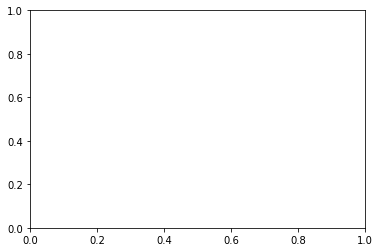

In [25]:
ae.fit(X,y)

In [26]:
ae.data_train.labels.shape
ae.data_train.x.shape


(38880, 96, 96, 1)

In [27]:
ae.run_metrics()

Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-30957 ...

Model loaded
EPOCHS trained:  51
random sample batch ...


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:13<00:00, 11.59it/s]


Unsupervised metric[0.39522103]


  0%|                                                                                          | 0/151 [00:00<?, ?it/s]

Entropy [1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 0.95027054
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.05492017 1.33217904
 1.05492017 1.33217904 1.33217904 1.60943791 1.60943791 0.95027054
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791
 0.67301167 0.95027054 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 0.95027054 1.60943791 1.33217904 1.05492017
 1.33217904 1.60943791 1.60943791 1.33217904] M value [[1.60943791 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.60943791 1.60943791 1.33217904 ... 1.609

  1%|▌                                                                                 | 1/151 [00:02<06:41,  2.67s/it]

Entropy [1.60943791 1.33217904 1.33217904 1.60943791 1.05492017 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 0.95027054 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.05492017 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.05492017
 1.33217904 0.95027054 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.05492017 1.60943791] M value [[1.60943791 1.33217904 1.33217904 ... 1.33217904 1.05492017 1.60943791]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.05492017 1.60943791]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.05492017 1.60943791]
 ...
 [1.60943791 1.33217904 1.33217904 ... 1.332

  1%|█                                                                                 | 2/151 [00:05<06:32,  2.63s/it]

Entropy [1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 0.95027054 1.33217904 1.60943791
 0.95027054 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.05492017 0.95027054 1.60943791 1.05492017
 0.95027054 1.33217904 0.95027054 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 0.95027054 1.60943791 1.60943791 1.33217904
 1.60943791 0.95027054 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.05492017 0.95027054 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.05492017 1.60943791] M value [[1.33217904 1.60943791 1.60943791 ... 1.33217904 1.05492017 1.60943791]
 [1.33217904 1.60943791 1.60943791 ... 1.33217904 1.05492017 1.60943791]
 [1.33217904 1.60943791 1.60943791 ... 1.33217904 1.05492017 1.60943791]
 ...
 [1.33217904 1.60943791 1.60943791 ... 1.332

  2%|█▋                                                                                | 3/151 [00:07<06:24,  2.60s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 0.95027054 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 0.95027054
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.05492017 1.05492017 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 0.95027054
 1.60943791 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791] M value [[1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.609

  3%|██▏                                                                               | 4/151 [00:10<06:18,  2.57s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 0.95027054 1.33217904 1.60943791 1.60943791 1.60943791 1.05492017
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.05492017 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 0.95027054 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.05492017 1.33217904 1.60943791] M value [[1.33217904 1.33217904 1.33217904 ... 1.05492017 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.05492017 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.05492017 1.33217904 1.60943791]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.054

  3%|██▋                                                                               | 5/151 [00:12<06:13,  2.56s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791
 0.95027054 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 0.95027054 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 0.95027054 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 0.95027054 1.33217904 1.60943791] M value [[1.60943791 1.33217904 1.60943791 ... 0.95027054 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 0.95027054 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 0.95027054 1.33217904 1.60943791]
 ...
 [1.60943791 1.33217904 1.60943791 ... 0.950

  4%|███▎                                                                              | 6/151 [00:15<06:08,  2.54s/it]

Entropy [1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 0.95027054 1.33217904 1.60943791 0.67301167 1.33217904 1.60943791
 0.67301167 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.05492017 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.05492017 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.05492017 1.05492017 1.33217904 1.33217904 1.60943791
 1.05492017 1.33217904 0.95027054 1.60943791 1.60943791 1.60943791
 1.05492017 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904] M value [[1.60943791 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.33217904]
 [1.60943791 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.33217904]
 [1.60943791 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.33217904]
 ...
 [1.60943791 1.33217904 1.33217904 ... 1.609

  5%|███▊                                                                              | 7/151 [00:17<06:03,  2.53s/it]

Entropy [1.33217904 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 0.95027054 1.33217904 1.60943791 1.60943791 0.50040242
 1.60943791 1.33217904 1.60943791 1.60943791 0.95027054 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 0.50040242 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.05492017 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791] M value [[1.33217904 1.05492017 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.05492017 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.05492017 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.33217904 1.05492017 1.60943791 ... 1.609

  5%|████▎                                                                             | 8/151 [00:20<06:01,  2.52s/it]

Entropy [1.05492017 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.05492017 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.05492017 1.60943791 1.33217904 1.05492017
 1.60943791 0.95027054 1.60943791 1.33217904 1.33217904 1.05492017
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.05492017
 1.05492017 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.05492017 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.05492017 1.33217904 1.05492017 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904] M value [[1.05492017 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.33217904]
 [1.05492017 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.33217904]
 [1.05492017 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.33217904]
 ...
 [1.05492017 1.33217904 1.33217904 ... 1.609

  6%|████▉                                                                             | 9/151 [00:22<05:58,  2.53s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 0.95027054 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 0.95027054 1.33217904 1.60943791 1.05492017
 1.05492017 1.33217904 1.60943791 1.60943791 1.05492017 0.95027054
 1.33217904 1.33217904 0.95027054 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 0.95027054 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904] M value [[1.33217904 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.609

  7%|█████▎                                                                           | 10/151 [00:25<06:00,  2.55s/it]

Entropy [1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.05492017 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.05492017 1.60943791
 1.60943791 0.95027054 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 0.95027054 1.60943791 1.33217904 1.33217904
 1.60943791 1.05492017 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.05492017 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.05492017 1.33217904 1.33217904 1.05492017
 1.33217904 1.33217904 1.33217904 1.60943791] M value [[1.33217904 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.33217904 1.60943791 1.60943791 ... 1.332

  7%|█████▉                                                                           | 11/151 [00:28<05:59,  2.57s/it]

Entropy [1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 0.95027054
 0.95027054 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 0.95027054 1.60943791 1.33217904
 0.95027054 1.33217904 1.33217904 1.60943791] M value [[1.33217904 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.33217904 1.60943791 1.60943791 ... 1.332

  8%|██████▍                                                                          | 12/151 [00:30<06:00,  2.60s/it]

Entropy [1.33217904 1.33217904 1.33217904 0.95027054 1.33217904 0.95027054
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.05492017 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.05492017 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.05492017 1.33217904
 1.33217904 1.60943791 0.95027054 1.60943791 1.60943791 1.60943791
 1.60943791 1.05492017 1.33217904 0.95027054 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791] M value [[1.33217904 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.609

  9%|██████▉                                                                          | 13/151 [00:33<06:11,  2.69s/it]

Entropy [0.95027054 1.33217904 1.60943791 1.33217904 0.95027054 1.05492017
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.05492017
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.05492017 1.60943791] M value [[0.95027054 1.33217904 1.60943791 ... 1.60943791 1.05492017 1.60943791]
 [0.95027054 1.33217904 1.60943791 ... 1.60943791 1.05492017 1.60943791]
 [0.95027054 1.33217904 1.60943791 ... 1.60943791 1.05492017 1.60943791]
 ...
 [0.95027054 1.33217904 1.60943791 ... 1.609

  9%|███████▌                                                                         | 14/151 [00:36<06:08,  2.69s/it]

Entropy [1.05492017 1.33217904 1.60943791 0.95027054 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 0.95027054 1.60943791
 1.33217904 1.05492017 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 0.95027054 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 0.95027054 0.95027054 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.05492017 1.33217904 1.05492017 1.05492017 0.95027054
 1.60943791 1.33217904 1.60943791 1.33217904 0.95027054 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791] M value [[1.05492017 1.33217904 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 [1.05492017 1.33217904 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 [1.05492017 1.33217904 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.05492017 1.33217904 1.60943791 ... 1.332

 10%|████████                                                                         | 15/151 [00:39<06:11,  2.73s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.05492017 0.95027054 1.05492017 1.60943791 0.95027054 1.33217904
 1.05492017 0.95027054 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 0.95027054 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791] M value [[1.33217904 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.33217904 1.33217904 1.60943791 ... 1.609

 11%|████████▌                                                                        | 16/151 [00:42<06:21,  2.83s/it]

Entropy [1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.05492017 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.05492017
 0.95027054 1.33217904 1.33217904 0.95027054 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.05492017 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 0.95027054 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 0.95027054 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791] M value [[1.33217904 1.60943791 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.60943791 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.60943791 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.33217904 1.60943791 1.60943791 ... 1.609

 11%|█████████                                                                        | 17/151 [00:44<06:10,  2.76s/it]

Entropy [1.33217904 1.60943791 0.95027054 1.33217904 1.60943791 1.60943791
 1.33217904 0.95027054 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.05492017 1.60943791 1.33217904 1.05492017
 1.60943791 1.05492017 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.05492017
 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.05492017 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 0.95027054 1.60943791 1.60943791 1.33217904] M value [[1.33217904 1.60943791 0.95027054 ... 1.60943791 1.60943791 1.33217904]
 [1.33217904 1.60943791 0.95027054 ... 1.60943791 1.60943791 1.33217904]
 [1.33217904 1.60943791 0.95027054 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.33217904 1.60943791 0.95027054 ... 1.609

 12%|█████████▋                                                                       | 18/151 [00:48<06:32,  2.95s/it]

Entropy [1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.05492017 1.33217904 0.95027054 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.05492017 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.05492017 1.60943791 1.60943791 1.60943791 1.05492017
 1.60943791 1.60943791 1.33217904 1.33217904] M value [[1.60943791 1.60943791 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 [1.60943791 1.60943791 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 [1.60943791 1.60943791 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 ...
 [1.60943791 1.60943791 1.60943791 ... 1.609

 13%|██████████▏                                                                      | 19/151 [00:51<07:03,  3.21s/it]

Entropy [1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.05492017 1.33217904
 1.33217904 0.95027054 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.05492017 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 0.95027054 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.05492017] M value [[1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.05492017]
 [1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.05492017]
 [1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.05492017]
 ...
 [1.60943791 1.60943791 1.33217904 ... 1.332

 13%|██████████▋                                                                      | 20/151 [00:55<07:03,  3.24s/it]

Entropy [1.60943791 1.05492017 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.05492017 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.05492017 1.33217904 0.95027054 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.05492017 1.60943791
 1.05492017 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 0.95027054 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 0.67301167 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904] M value [[1.60943791 1.05492017 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.05492017 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.05492017 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.60943791 1.05492017 1.33217904 ... 1.609

 14%|███████████▎                                                                     | 21/151 [00:59<07:41,  3.55s/it]

Entropy [1.05492017 1.33217904 1.33217904 0.95027054 0.95027054 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 0.95027054 1.33217904 1.05492017 1.60943791 1.33217904 1.60943791
 1.33217904 0.95027054 1.33217904 1.60943791 1.33217904 1.60943791
 1.05492017 1.60943791 1.05492017 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 0.95027054
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.05492017 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 0.95027054 1.60943791
 1.33217904 0.95027054 1.60943791 1.60943791] M value [[1.05492017 1.33217904 1.33217904 ... 0.95027054 1.60943791 1.60943791]
 [1.05492017 1.33217904 1.33217904 ... 0.95027054 1.60943791 1.60943791]
 [1.05492017 1.33217904 1.33217904 ... 0.95027054 1.60943791 1.60943791]
 ...
 [1.05492017 1.33217904 1.33217904 ... 0.950

 15%|███████████▊                                                                     | 22/151 [01:02<07:16,  3.38s/it]

Entropy [1.05492017 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 0.95027054 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 0.67301167 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 0.95027054 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904] M value [[1.05492017 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 [1.05492017 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 [1.05492017 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 ...
 [1.05492017 1.33217904 1.60943791 ... 1.609

 15%|████████████▎                                                                    | 23/151 [01:05<06:54,  3.24s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.60943791 1.05492017 1.60943791
 1.60943791 0.95027054 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017
 1.33217904 1.33217904 0.95027054 1.33217904 1.60943791 0.95027054
 1.33217904 1.05492017 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 0.95027054 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.05492017 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791] M value [[1.33217904 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.609

 16%|████████████▊                                                                    | 24/151 [01:08<06:37,  3.13s/it]

Entropy [1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 0.95027054 1.33217904 0.95027054 1.33217904
 1.33217904 0.95027054 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.05492017 1.33217904 1.33217904 0.95027054 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.05492017
 1.33217904 1.60943791 1.33217904 1.05492017 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.05492017 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 0.95027054] M value [[1.33217904 1.60943791 1.33217904 ... 1.33217904 1.60943791 0.95027054]
 [1.33217904 1.60943791 1.33217904 ... 1.33217904 1.60943791 0.95027054]
 [1.33217904 1.60943791 1.33217904 ... 1.33217904 1.60943791 0.95027054]
 ...
 [1.33217904 1.60943791 1.33217904 ... 1.332

 17%|█████████████▍                                                                   | 25/151 [01:11<06:23,  3.05s/it]

Entropy [1.33217904 1.33217904 0.95027054 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.05492017 1.60943791
 1.60943791 1.33217904 1.05492017 1.33217904 1.33217904 1.60943791
 0.95027054 0.95027054 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.05492017 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904] M value [[1.33217904 1.33217904 0.95027054 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 1.33217904 0.95027054 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 1.33217904 0.95027054 ... 1.33217904 1.60943791 1.33217904]
 ...
 [1.33217904 1.33217904 0.95027054 ... 1.332

 17%|█████████████▉                                                                   | 26/151 [01:14<06:11,  2.97s/it]

Entropy [1.33217904 1.60943791 1.05492017 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 0.95027054
 1.60943791 1.33217904 1.60943791 1.60943791 1.05492017 1.05492017
 1.33217904 1.33217904 1.60943791 0.95027054 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.05492017
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.05492017 0.95027054
 1.60943791 1.33217904 1.33217904 1.60943791 0.67301167 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 0.95027054
 1.60943791 1.33217904 1.33217904 1.33217904] M value [[1.33217904 1.60943791 1.05492017 ... 1.33217904 1.33217904 1.33217904]
 [1.33217904 1.60943791 1.05492017 ... 1.33217904 1.33217904 1.33217904]
 [1.33217904 1.60943791 1.05492017 ... 1.33217904 1.33217904 1.33217904]
 ...
 [1.33217904 1.60943791 1.05492017 ... 1.332

 18%|██████████████▍                                                                  | 27/151 [01:16<06:03,  2.93s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 0.95027054 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 0.95027054 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 0.95027054 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.05492017 1.60943791 1.60943791 1.33217904] M value [[1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.609

 19%|███████████████                                                                  | 28/151 [01:19<05:55,  2.89s/it]

Entropy [1.60943791 1.60943791 1.33217904 1.60943791 0.95027054 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 0.95027054 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.05492017 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 0.95027054 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791] M value [[1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.60943791 1.60943791 1.33217904 ... 1.332

 19%|███████████████▌                                                                 | 29/151 [01:22<05:49,  2.86s/it]

Entropy [1.05492017 1.33217904 0.95027054 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.05492017 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 0.95027054 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.05492017 1.33217904 1.33217904 0.95027054 1.60943791
 0.95027054 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.05492017 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 0.95027054
 1.60943791 1.33217904 1.60943791 0.95027054] M value [[1.05492017 1.33217904 0.95027054 ... 1.33217904 1.60943791 0.95027054]
 [1.05492017 1.33217904 0.95027054 ... 1.33217904 1.60943791 0.95027054]
 [1.05492017 1.33217904 0.95027054 ... 1.33217904 1.60943791 0.95027054]
 ...
 [1.05492017 1.33217904 0.95027054 ... 1.332

 20%|████████████████                                                                 | 30/151 [01:25<05:46,  2.86s/it]

Entropy [1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.05492017 1.60943791 1.33217904
 1.60943791 1.05492017 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 0.95027054 1.33217904 1.33217904 1.33217904
 1.60943791 0.95027054 1.33217904 1.33217904 0.95027054 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.05492017 1.60943791
 1.33217904 0.95027054 1.60943791 0.95027054 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904] M value [[1.33217904 1.60943791 1.33217904 ... 1.60943791 1.33217904 1.33217904]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 1.33217904 1.33217904]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 1.33217904 1.33217904]
 ...
 [1.33217904 1.60943791 1.33217904 ... 1.609

 21%|████████████████▋                                                                | 31/151 [01:28<05:42,  2.85s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.05492017 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 0.67301167 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 0.95027054 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 0.67301167
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.05492017 1.33217904] M value [[1.33217904 1.33217904 1.60943791 ... 1.33217904 1.05492017 1.33217904]
 [1.33217904 1.33217904 1.60943791 ... 1.33217904 1.05492017 1.33217904]
 [1.33217904 1.33217904 1.60943791 ... 1.33217904 1.05492017 1.33217904]
 ...
 [1.33217904 1.33217904 1.60943791 ... 1.332

 21%|█████████████████▏                                                               | 32/151 [01:31<05:41,  2.87s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017
 1.33217904 1.60943791 1.33217904 1.60943791 1.05492017 1.33217904
 1.33217904 1.60943791 0.95027054 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 0.95027054 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 0.95027054 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 0.95027054 1.33217904
 1.60943791 1.60943791 1.33217904 0.50040242 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904] M value [[1.33217904 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.33217904 1.33217904 1.60943791 ... 1.609

 22%|█████████████████▋                                                               | 33/151 [01:34<05:45,  2.92s/it]

Entropy [1.33217904 1.60943791 1.05492017 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.05492017 1.60943791 1.60943791 1.33217904 1.33217904
 1.05492017 1.60943791 0.95027054 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.05492017 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.05492017 1.05492017
 1.33217904 1.60943791 0.95027054 1.33217904] M value [[1.33217904 1.60943791 1.05492017 ... 1.60943791 0.95027054 1.33217904]
 [1.33217904 1.60943791 1.05492017 ... 1.60943791 0.95027054 1.33217904]
 [1.33217904 1.60943791 1.05492017 ... 1.60943791 0.95027054 1.33217904]
 ...
 [1.33217904 1.60943791 1.05492017 ... 1.609

 23%|██████████████████▏                                                              | 34/151 [01:37<05:42,  2.93s/it]

Entropy [1.05492017 1.05492017 1.33217904 0.95027054 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.05492017
 1.33217904 0.95027054 1.33217904 1.05492017 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 0.95027054 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 0.95027054 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 0.95027054 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.05492017 1.33217904 0.95027054 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904] M value [[1.05492017 1.05492017 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.05492017 1.05492017 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.05492017 1.05492017 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 ...
 [1.05492017 1.05492017 1.33217904 ... 1.332

 23%|██████████████████▊                                                              | 35/151 [01:39<05:35,  2.89s/it]

Entropy [0.95027054 1.33217904 1.05492017 1.60943791 1.60943791 1.33217904
 1.05492017 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 0.50040242 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.05492017
 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904 0.95027054
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 0.95027054
 1.33217904 1.33217904 1.05492017 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.05492017 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.05492017 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904] M value [[0.95027054 1.33217904 1.05492017 ... 1.60943791 1.60943791 1.33217904]
 [0.95027054 1.33217904 1.05492017 ... 1.60943791 1.60943791 1.33217904]
 [0.95027054 1.33217904 1.05492017 ... 1.60943791 1.60943791 1.33217904]
 ...
 [0.95027054 1.33217904 1.05492017 ... 1.609

 24%|███████████████████▎                                                             | 36/151 [01:42<05:30,  2.87s/it]

Entropy [1.05492017 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.05492017 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.05492017 1.60943791
 0.95027054 1.33217904 1.33217904 1.33217904 0.95027054 0.67301167
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 0.67301167 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.05492017
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791] M value [[1.05492017 1.33217904 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 [1.05492017 1.33217904 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 [1.05492017 1.33217904 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.05492017 1.33217904 1.60943791 ... 1.332

 25%|███████████████████▊                                                             | 37/151 [01:45<05:26,  2.86s/it]

Entropy [1.60943791 1.60943791 1.60943791 1.33217904 1.05492017 1.60943791
 1.33217904 1.60943791 1.60943791 0.95027054 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 0.95027054 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 0.95027054 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.05492017 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.05492017 1.60943791 1.33217904 1.33217904 1.05492017 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904] M value [[1.60943791 1.60943791 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.60943791 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.60943791 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.60943791 1.60943791 1.60943791 ... 1.609

 25%|████████████████████▍                                                            | 38/151 [01:48<05:21,  2.85s/it]

Entropy [1.33217904 1.05492017 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.05492017
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.05492017 1.05492017 1.33217904 1.33217904 0.95027054 1.60943791
 1.60943791 0.95027054 1.05492017 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.05492017 0.95027054 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791] M value [[1.33217904 1.05492017 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.05492017 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.05492017 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.33217904 1.05492017 1.33217904 ... 1.332

 26%|████████████████████▉                                                            | 39/151 [01:51<05:20,  2.86s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.05492017 1.33217904 1.60943791
 0.95027054 1.60943791 1.05492017 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.05492017 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.05492017 1.60943791 1.60943791 1.60943791 1.60943791
 1.05492017 1.05492017 1.05492017 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 1.60943791 0.95027054] M value [[1.33217904 1.33217904 1.60943791 ... 1.60943791 1.60943791 0.95027054]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.60943791 0.95027054]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.60943791 0.95027054]
 ...
 [1.33217904 1.33217904 1.60943791 ... 1.609

 26%|█████████████████████▍                                                           | 40/151 [01:54<05:16,  2.86s/it]

Entropy [1.60943791 1.33217904 0.95027054 1.33217904 1.33217904 1.05492017
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 0.95027054 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 0.95027054 1.60943791 1.60943791 0.95027054 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017
 1.60943791 1.33217904 1.33217904 0.95027054 1.60943791 1.60943791
 1.33217904 0.95027054 1.33217904 1.60943791] M value [[1.60943791 1.33217904 0.95027054 ... 0.95027054 1.33217904 1.60943791]
 [1.60943791 1.33217904 0.95027054 ... 0.95027054 1.33217904 1.60943791]
 [1.60943791 1.33217904 0.95027054 ... 0.95027054 1.33217904 1.60943791]
 ...
 [1.60943791 1.33217904 0.95027054 ... 0.950

 27%|█████████████████████▉                                                           | 41/151 [01:56<05:12,  2.84s/it]

Entropy [1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 0.67301167 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.05492017 1.33217904 1.33217904
 1.05492017 1.33217904 1.60943791 1.33217904 1.60943791 1.05492017
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 0.95027054
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904] M value [[1.60943791 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 ...
 [1.60943791 1.33217904 1.33217904 ... 1.332

 28%|██████████████████████▌                                                          | 42/151 [01:59<05:08,  2.83s/it]

Entropy [0.95027054 1.05492017 1.33217904 0.95027054 1.33217904 1.33217904
 1.33217904 0.95027054 1.33217904 1.60943791 1.05492017 1.05492017
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 0.95027054 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791
 1.05492017 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 0.95027054
 1.60943791 1.60943791 1.33217904 1.33217904 0.50040242 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904] M value [[0.95027054 1.05492017 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [0.95027054 1.05492017 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [0.95027054 1.05492017 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 ...
 [0.95027054 1.05492017 1.33217904 ... 1.609

 28%|███████████████████████                                                          | 43/151 [02:02<05:05,  2.83s/it]

Entropy [1.05492017 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.05492017 1.33217904
 0.95027054 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.05492017 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 0.95027054 1.33217904 1.60943791 1.33217904 0.95027054 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791] M value [[1.05492017 1.60943791 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.05492017 1.60943791 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.05492017 1.60943791 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 ...
 [1.05492017 1.60943791 1.60943791 ... 1.332

 29%|███████████████████████▌                                                         | 44/151 [02:05<05:00,  2.81s/it]

Entropy [1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 0.95027054 0.95027054 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.05492017 1.60943791 1.33217904 1.05492017
 1.60943791 1.33217904 1.60943791 1.05492017 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 0.67301167 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.05492017 1.33217904
 0.95027054 1.60943791 1.05492017 1.60943791] M value [[1.33217904 1.60943791 1.33217904 ... 1.60943791 1.05492017 1.60943791]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 1.05492017 1.60943791]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 1.05492017 1.60943791]
 ...
 [1.33217904 1.60943791 1.33217904 ... 1.609

 30%|████████████████████████▏                                                        | 45/151 [02:08<04:57,  2.81s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 0.95027054
 1.60943791 0.67301167 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 0.95027054 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 0.95027054 1.05492017
 1.33217904 1.60943791 0.95027054 1.33217904 0.95027054 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.05492017 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904] M value [[1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.609

 30%|████████████████████████▋                                                        | 46/151 [02:17<08:27,  4.83s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.60943791 0.50040242 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.05492017 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791] M value [[1.60943791 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.609

 31%|█████████████████████████▏                                                       | 47/151 [02:20<07:20,  4.24s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.05492017 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.05492017
 1.60943791 1.33217904 0.95027054 0.95027054 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 0.95027054 1.60943791 1.33217904] M value [[1.33217904 1.33217904 1.60943791 ... 0.95027054 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.60943791 ... 0.95027054 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.60943791 ... 0.95027054 1.60943791 1.33217904]
 ...
 [1.33217904 1.33217904 1.60943791 ... 0.950

 32%|█████████████████████████▋                                                       | 48/151 [02:23<06:33,  3.82s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 0.         1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.05492017 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.05492017 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.05492017 1.60943791
 1.60943791 1.05492017 1.05492017 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 0.95027054] M value [[1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 0.95027054]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 0.95027054]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 0.95027054]
 ...
 [1.33217904 1.33217904 1.60943791 ... 1.609

 32%|██████████████████████████▎                                                      | 49/151 [02:26<06:00,  3.54s/it]

Entropy [1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.05492017 1.33217904
 1.60943791 1.05492017 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.05492017 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 0.95027054
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 0.95027054] M value [[1.33217904 1.60943791 1.33217904 ... 1.33217904 1.33217904 0.95027054]
 [1.33217904 1.60943791 1.33217904 ... 1.33217904 1.33217904 0.95027054]
 [1.33217904 1.60943791 1.33217904 ... 1.33217904 1.33217904 0.95027054]
 ...
 [1.33217904 1.60943791 1.33217904 ... 1.332

 33%|██████████████████████████▊                                                      | 50/151 [02:28<05:35,  3.32s/it]

Entropy [1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 0.95027054 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 0.95027054
 1.05492017 1.33217904 1.60943791 1.33217904 1.05492017 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.05492017 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904 0.95027054
 1.33217904 1.33217904 0.95027054 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.05492017 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791] M value [[1.33217904 1.60943791 1.33217904 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.33217904 1.60943791 1.33217904 ... 1.609

 34%|███████████████████████████▎                                                     | 51/151 [02:31<05:17,  3.17s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.05492017 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 0.95027054 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 0.95027054
 0.95027054 1.60943791 1.60943791 1.60943791 1.05492017 0.95027054
 0.95027054 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904] M value [[1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 ...
 [1.33217904 1.33217904 1.60943791 ... 1.609

 34%|███████████████████████████▉                                                     | 52/151 [02:34<05:07,  3.11s/it]

Entropy [1.60943791 1.33217904 1.05492017 1.60943791 0.95027054 0.95027054
 1.33217904 1.60943791 1.60943791 0.95027054 1.33217904 1.05492017
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.05492017 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791] M value [[1.60943791 1.33217904 1.05492017 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.05492017 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.05492017 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.60943791 1.33217904 1.05492017 ... 1.609

 35%|████████████████████████████▍                                                    | 53/151 [02:37<05:03,  3.09s/it]

Entropy [1.33217904 1.05492017 1.33217904 0.95027054 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.05492017
 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.05492017 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.05492017 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 0.95027054 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904] M value [[1.33217904 1.05492017 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.33217904 1.05492017 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.33217904 1.05492017 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.33217904 1.05492017 1.33217904 ... 1.609

 36%|████████████████████████████▉                                                    | 54/151 [02:40<04:56,  3.06s/it]

Entropy [1.33217904 1.60943791 0.95027054 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 0.95027054 1.33217904 1.60943791
 1.60943791 1.05492017 1.05492017 1.33217904 1.33217904 1.60943791
 1.33217904 1.05492017 1.33217904 1.33217904 1.60943791 1.05492017
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 0.95027054
 1.33217904 1.60943791 1.60943791 1.33217904 0.95027054 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 0.95027054 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791] M value [[1.33217904 1.60943791 0.95027054 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.60943791 0.95027054 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.60943791 0.95027054 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.33217904 1.60943791 0.95027054 ... 1.609

 36%|█████████████████████████████▌                                                   | 55/151 [02:43<04:47,  3.00s/it]

Entropy [0.95027054 1.33217904 1.60943791 1.05492017 1.60943791 1.33217904
 0.95027054 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.05492017 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.05492017 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.05492017 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 0.95027054 1.33217904
 1.60943791 0.95027054 1.60943791 0.67301167 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904] M value [[0.95027054 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 [0.95027054 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 [0.95027054 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 ...
 [0.95027054 1.33217904 1.60943791 ... 1.609

 37%|██████████████████████████████                                                   | 56/151 [02:46<04:39,  2.94s/it]

Entropy [1.33217904 1.33217904 1.05492017 1.33217904 1.33217904 1.05492017
 1.33217904 1.60943791 1.60943791 0.95027054 1.33217904 1.33217904
 1.33217904 1.60943791 0.95027054 1.05492017 1.05492017 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.05492017 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.05492017 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 0.95027054 1.60943791 1.60943791 1.60943791] M value [[1.33217904 1.33217904 1.05492017 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.33217904 1.05492017 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.33217904 1.05492017 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.33217904 1.33217904 1.05492017 ... 1.609

 38%|██████████████████████████████▌                                                  | 57/151 [02:49<04:33,  2.91s/it]

Entropy [1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.05492017 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.05492017 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 0.95027054 0.95027054 1.05492017 1.05492017 1.60943791 1.60943791
 1.33217904 1.05492017 1.33217904 1.33217904 0.95027054 1.60943791
 1.60943791 0.95027054 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 0.95027054 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 0.95027054 0.95027054 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791] M value [[1.33217904 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.33217904 1.60943791 1.33217904 ... 1.332

 38%|███████████████████████████████                                                  | 58/151 [02:52<04:28,  2.89s/it]

Entropy [1.33217904 0.95027054 1.33217904 1.60943791 1.60943791 1.60943791
 1.05492017 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.05492017 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.05492017 1.33217904 1.33217904
 1.05492017 1.33217904 1.33217904 1.33217904 1.05492017 1.33217904
 1.33217904 0.95027054 1.33217904 1.60943791 0.95027054 1.33217904
 1.33217904 1.33217904 1.05492017 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.05492017] M value [[1.33217904 0.95027054 1.33217904 ... 1.33217904 1.33217904 1.05492017]
 [1.33217904 0.95027054 1.33217904 ... 1.33217904 1.33217904 1.05492017]
 [1.33217904 0.95027054 1.33217904 ... 1.33217904 1.33217904 1.05492017]
 ...
 [1.33217904 0.95027054 1.33217904 ... 1.332

 39%|███████████████████████████████▋                                                 | 59/151 [02:55<04:25,  2.88s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 0.95027054
 1.60943791 1.33217904 1.33217904 1.60943791 1.05492017 1.33217904
 1.05492017 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 0.95027054 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.05492017 1.05492017 1.33217904 1.33217904 1.33217904 1.60943791
 0.95027054 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 0.95027054 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904] M value [[1.33217904 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.332

 40%|████████████████████████████████▏                                                | 60/151 [02:57<04:20,  2.86s/it]

Entropy [1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.05492017
 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 0.95027054 1.33217904
 1.05492017 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.05492017 1.33217904 1.60943791 0.95027054
 1.33217904 1.05492017 1.60943791 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904] M value [[1.60943791 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 ...
 [1.60943791 1.33217904 1.33217904 ... 1.332

 40%|████████████████████████████████▋                                                | 61/151 [03:00<04:19,  2.88s/it]

Entropy [1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 0.95027054 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 0.95027054 1.33217904 1.05492017 1.33217904 1.60943791 1.33217904
 1.33217904 0.95027054 0.95027054 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 0.95027054 1.33217904 1.05492017 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.05492017
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904] M value [[1.60943791 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.60943791 1.60943791 1.33217904 ... 1.609

 41%|█████████████████████████████████▎                                               | 62/151 [03:03<04:16,  2.88s/it]

Entropy [1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 0.95027054
 1.60943791 0.95027054 1.33217904 0.95027054 1.33217904 1.33217904
 1.33217904 0.95027054 1.60943791 1.33217904 1.60943791 1.60943791
 1.05492017 1.60943791 1.60943791 1.33217904 1.60943791 1.05492017
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 0.95027054
 1.33217904 1.60943791 1.05492017 1.33217904 1.60943791 1.33217904
 1.60943791 1.05492017 1.33217904 1.60943791] M value [[1.60943791 1.60943791 1.60943791 ... 1.05492017 1.33217904 1.60943791]
 [1.60943791 1.60943791 1.60943791 ... 1.05492017 1.33217904 1.60943791]
 [1.60943791 1.60943791 1.60943791 ... 1.05492017 1.33217904 1.60943791]
 ...
 [1.60943791 1.60943791 1.60943791 ... 1.054

 42%|█████████████████████████████████▊                                               | 63/151 [03:06<04:13,  2.88s/it]

Entropy [1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.05492017 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.05492017 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 0.95027054 1.60943791 1.33217904 1.05492017
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.05492017 1.33217904 1.60943791 1.60943791 1.33217904
 0.95027054 1.33217904 1.33217904 1.60943791] M value [[1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.60943791 1.60943791 1.33217904 ... 1.332

 42%|██████████████████████████████████▎                                              | 64/151 [03:09<04:13,  2.91s/it]

Entropy [1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.05492017 1.33217904 1.60943791 1.33217904
 1.33217904 0.95027054 1.60943791 1.33217904 1.33217904 1.60943791
 0.95027054 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 0.95027054 1.33217904
 1.60943791 1.60943791 1.33217904 0.95027054 1.33217904 0.50040242
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.05492017 1.33217904 1.60943791
 1.33217904 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791] M value [[1.60943791 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.60943791 1.33217904 1.33217904 ... 1.332

 43%|██████████████████████████████████▊                                              | 65/151 [03:12<04:15,  2.97s/it]

Entropy [1.05492017 1.60943791 1.33217904 1.33217904 1.60943791 1.05492017
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 0.95027054 1.33217904 1.33217904
 1.33217904 1.05492017 1.33217904 1.60943791 1.05492017 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.05492017 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.05492017 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904] M value [[1.05492017 1.60943791 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.05492017 1.60943791 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.05492017 1.60943791 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 ...
 [1.05492017 1.60943791 1.33217904 ... 1.332

 44%|███████████████████████████████████▍                                             | 66/151 [03:15<04:10,  2.95s/it]

Entropy [1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.05492017
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 0.95027054
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 0.95027054 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 0.95027054 1.33217904
 1.33217904 1.33217904 1.60943791 0.95027054 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904] M value [[1.60943791 1.60943791 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.60943791 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.60943791 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.60943791 1.60943791 1.60943791 ... 1.609

 44%|███████████████████████████████████▉                                             | 67/151 [03:18<04:06,  2.94s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 0.95027054 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 0.95027054 0.95027054
 1.60943791 1.33217904 0.95027054 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 0.95027054 1.60943791 1.33217904
 1.60943791 1.05492017 1.60943791 1.33217904 0.95027054 1.60943791
 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 0.95027054 1.60943791
 0.67301167 1.05492017 1.33217904 1.60943791] M value [[1.60943791 1.33217904 1.60943791 ... 1.05492017 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.05492017 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.05492017 1.33217904 1.60943791]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.054

 45%|████████████████████████████████████▍                                            | 68/151 [03:21<04:03,  2.93s/it]

Entropy [1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.05492017 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.05492017 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 0.95027054 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.05492017 1.33217904 1.33217904 1.60943791 1.33217904 0.95027054
 1.33217904 1.60943791 1.05492017 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791] M value [[1.33217904 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.33217904 1.60943791 1.60943791 ... 1.332

 46%|█████████████████████████████████████                                            | 69/151 [03:24<03:59,  2.92s/it]

Entropy [0.95027054 1.60943791 1.33217904 1.33217904 0.95027054 0.67301167
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 0.95027054 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.05492017 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.05492017 1.05492017 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 0.95027054 1.60943791 1.05492017 1.33217904 1.60943791 1.05492017
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.05492017] M value [[0.95027054 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.05492017]
 [0.95027054 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.05492017]
 [0.95027054 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.05492017]
 ...
 [0.95027054 1.60943791 1.33217904 ... 1.609

 46%|█████████████████████████████████████▌                                           | 70/151 [03:27<03:55,  2.91s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.05492017 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.05492017 1.33217904 1.60943791 1.33217904 1.33217904
 1.05492017 1.60943791 1.33217904 1.05492017 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 0.95027054 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 0.95027054
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.05492017
 1.33217904 1.33217904 1.33217904 1.60943791] M value [[1.33217904 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.332

 47%|██████████████████████████████████████                                           | 71/151 [03:29<03:51,  2.89s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.05492017 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.05492017 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 0.95027054
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.05492017 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.05492017
 1.60943791 1.33217904 1.33217904 1.33217904] M value [[1.60943791 1.33217904 1.60943791 ... 1.33217904 1.33217904 1.33217904]
 [1.60943791 1.33217904 1.60943791 ... 1.33217904 1.33217904 1.33217904]
 [1.60943791 1.33217904 1.60943791 ... 1.33217904 1.33217904 1.33217904]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.332

 48%|██████████████████████████████████████▌                                          | 72/151 [03:32<03:48,  2.89s/it]

Entropy [1.60943791 1.33217904 1.33217904 1.05492017 0.95027054 1.60943791
 0.95027054 1.60943791 1.60943791 1.33217904 1.05492017 1.33217904
 1.05492017 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 0.95027054 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.05492017 1.05492017 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.05492017 1.60943791 1.60943791] M value [[1.60943791 1.33217904 1.33217904 ... 1.05492017 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.33217904 ... 1.05492017 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.33217904 ... 1.05492017 1.60943791 1.60943791]
 ...
 [1.60943791 1.33217904 1.33217904 ... 1.054

 48%|███████████████████████████████████████▏                                         | 73/151 [03:35<03:44,  2.87s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.05492017
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.05492017
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.05492017 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.05492017 1.60943791 1.33217904
 1.60943791 0.95027054 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.05492017
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.05492017
 1.33217904 1.33217904 1.33217904 1.05492017 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791] M value [[1.60943791 1.33217904 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.332

 49%|███████████████████████████████████████▋                                         | 74/151 [03:38<03:44,  2.92s/it]

Entropy [1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.05492017 1.33217904
 1.33217904 1.60943791 1.60943791 0.95027054 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.05492017 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.05492017 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 0.95027054 0.95027054] M value [[1.33217904 1.60943791 1.33217904 ... 1.60943791 0.95027054 0.95027054]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 0.95027054 0.95027054]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 0.95027054 0.95027054]
 ...
 [1.33217904 1.60943791 1.33217904 ... 1.609

 50%|████████████████████████████████████████▏                                        | 75/151 [03:41<03:45,  2.97s/it]

Entropy [0.95027054 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 0.95027054 1.33217904
 0.67301167 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 0.95027054 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.05492017 0.95027054
 1.60943791 1.33217904 1.33217904 1.33217904] M value [[0.95027054 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 [0.95027054 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 [0.95027054 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 ...
 [0.95027054 1.60943791 1.33217904 ... 1.332

 50%|████████████████████████████████████████▊                                        | 76/151 [03:44<03:40,  2.94s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.05492017 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.05492017 1.60943791
 1.05492017 1.60943791 1.33217904 1.33217904 1.33217904 1.05492017
 1.60943791 1.60943791 1.05492017 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 0.95027054 1.05492017 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.05492017 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.05492017 1.60943791 1.60943791 1.60943791
 1.60943791 1.05492017 1.33217904 1.60943791] M value [[1.33217904 1.33217904 1.60943791 ... 1.05492017 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.05492017 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.05492017 1.33217904 1.60943791]
 ...
 [1.33217904 1.33217904 1.60943791 ... 1.054

 51%|█████████████████████████████████████████▎                                       | 77/151 [03:47<03:34,  2.90s/it]

Entropy [1.60943791 1.33217904 1.05492017 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 0.50040242 1.05492017 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 0.95027054 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 0.95027054 1.05492017
 1.33217904 1.33217904 1.60943791 1.05492017 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 0.95027054 0.95027054 0.50040242
 1.33217904 1.60943791 1.33217904 1.60943791] M value [[1.60943791 1.33217904 1.05492017 ... 1.60943791 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.05492017 ... 1.60943791 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.05492017 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.60943791 1.33217904 1.05492017 ... 1.609

 52%|█████████████████████████████████████████▊                                       | 78/151 [03:50<03:30,  2.88s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.05492017 1.33217904 1.60943791
 1.05492017 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 0.95027054 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017
 1.60943791 0.95027054 1.60943791 1.60943791 1.33217904 1.05492017
 0.95027054 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.05492017 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.05492017 1.33217904 1.33217904
 1.60943791 0.95027054 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904] M value [[1.33217904 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.332

 52%|██████████████████████████████████████████▍                                      | 79/151 [03:53<03:27,  2.88s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.33217904 0.95027054 1.60943791
 1.33217904 0.95027054 1.33217904 1.60943791 1.33217904 1.05492017
 1.60943791 1.33217904 1.60943791 1.05492017 1.60943791 1.60943791
 1.60943791 1.60943791 1.05492017 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 0.95027054 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 0.95027054 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904
 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.05492017 1.33217904] M value [[1.33217904 1.33217904 1.33217904 ... 1.60943791 1.05492017 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.05492017 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.05492017 1.33217904]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.609

 53%|██████████████████████████████████████████▉                                      | 80/151 [03:56<03:23,  2.86s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017 1.05492017
 1.33217904 1.60943791 1.60943791 1.33217904 0.95027054 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 0.95027054 1.05492017 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.05492017 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791] M value [[1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.33217904 1.33217904 1.60943791 ... 1.609

 54%|███████████████████████████████████████████▍                                     | 81/151 [03:58<03:19,  2.85s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.60943791 0.67301167 0.95027054
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 0.95027054 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.05492017 1.60943791 1.33217904 1.05492017 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 0.95027054 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 0.95027054 1.60943791 1.60943791] M value [[1.33217904 1.33217904 1.60943791 ... 0.95027054 1.60943791 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 0.95027054 1.60943791 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 0.95027054 1.60943791 1.60943791]
 ...
 [1.33217904 1.33217904 1.60943791 ... 0.950

 54%|███████████████████████████████████████████▉                                     | 82/151 [04:01<03:17,  2.86s/it]

Entropy [1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.05492017 1.33217904 1.60943791 1.60943791 0.95027054
 1.33217904 1.60943791 0.95027054 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.05492017 1.33217904 1.33217904 1.60943791 1.33217904 0.95027054
 1.60943791 0.95027054 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904] M value [[1.33217904 1.60943791 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 1.60943791 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 1.60943791 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 ...
 [1.33217904 1.60943791 1.33217904 ... 1.332

 55%|████████████████████████████████████████████▌                                    | 83/151 [04:04<03:14,  2.85s/it]

Entropy [1.05492017 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 0.50040242 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017
 1.60943791 1.60943791 0.95027054 1.60943791 0.67301167 0.95027054
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.05492017
 1.60943791 1.60943791 0.95027054 1.60943791 0.95027054 1.33217904
 1.33217904 1.60943791 0.95027054 1.33217904 1.60943791 1.33217904
 1.05492017 1.05492017 1.33217904 1.60943791 1.60943791 1.33217904
 0.95027054 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791] M value [[1.05492017 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.05492017 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.05492017 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.05492017 1.33217904 1.33217904 ... 1.332

 56%|█████████████████████████████████████████████                                    | 84/151 [04:07<03:10,  2.85s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.05492017 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 0.95027054 1.60943791
 1.60943791 1.60943791 1.33217904 1.05492017 1.60943791 1.60943791
 0.95027054 1.60943791 1.05492017 0.95027054 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.05492017 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 0.95027054 1.60943791 1.33217904 1.33217904] M value [[1.60943791 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.33217904]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.609

 56%|█████████████████████████████████████████████▌                                   | 85/151 [04:10<03:07,  2.85s/it]

Entropy [1.60943791 1.60943791 0.95027054 1.33217904 0.95027054 1.33217904
 1.60943791 1.60943791 1.05492017 1.33217904 1.33217904 1.60943791
 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.05492017 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.05492017 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.05492017
 1.60943791 1.60943791 1.33217904 1.60943791] M value [[1.60943791 1.60943791 0.95027054 ... 1.60943791 1.33217904 1.60943791]
 [1.60943791 1.60943791 0.95027054 ... 1.60943791 1.33217904 1.60943791]
 [1.60943791 1.60943791 0.95027054 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.60943791 1.60943791 0.95027054 ... 1.609

 57%|██████████████████████████████████████████████▏                                  | 86/151 [04:13<03:04,  2.84s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 0.50040242
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.05492017 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.05492017 1.33217904
 1.60943791 1.33217904 1.05492017 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 0.95027054 1.60943791
 1.60943791 1.33217904 1.60943791 0.95027054 1.60943791 1.33217904
 1.05492017 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904] M value [[1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.609

 58%|██████████████████████████████████████████████▋                                  | 87/151 [04:15<03:01,  2.84s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.60943791 0.95027054 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.05492017 1.60943791
 1.60943791 1.60943791 0.50040242 1.60943791 1.60943791 1.05492017
 1.05492017 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 0.67301167 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.05492017 1.05492017 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791] M value [[1.33217904 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.609

 58%|███████████████████████████████████████████████▏                                 | 88/151 [04:18<02:58,  2.84s/it]

Entropy [1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.05492017 1.05492017
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 0.95027054
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.05492017 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 0.95027054 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 0.95027054 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 0.95027054 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904] M value [[1.60943791 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.33217904]
 [1.60943791 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.33217904]
 [1.60943791 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.33217904]
 ...
 [1.60943791 1.60943791 1.60943791 ... 1.332

 59%|███████████████████████████████████████████████▋                                 | 89/151 [04:21<02:55,  2.84s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.05492017 1.33217904 0.95027054 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 0.95027054 1.05492017 1.60943791 1.05492017 1.05492017 1.05492017
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 0.95027054 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 0.95027054 1.60943791 1.05492017 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 0.67301167
 1.60943791 1.60943791 1.33217904 1.33217904] M value [[1.33217904 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.33217904]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.609

 60%|████████████████████████████████████████████████▎                                | 90/151 [04:24<02:52,  2.83s/it]

Entropy [1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 0.95027054 1.60943791 1.33217904 0.95027054 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.05492017 1.33217904 1.05492017 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.05492017 1.60943791 1.33217904 1.60943791
 1.05492017 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791] M value [[1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.60943791 1.60943791 1.33217904 ... 1.332

 60%|████████████████████████████████████████████████▊                                | 91/151 [04:27<02:50,  2.84s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.05492017 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.05492017 1.33217904 1.05492017 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 0.67301167 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 0.95027054 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904] M value [[1.33217904 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.332

 61%|█████████████████████████████████████████████████▎                               | 92/151 [04:30<02:46,  2.83s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.05492017 1.60943791
 1.33217904 1.05492017 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.05492017 1.05492017 1.33217904 1.33217904
 1.05492017 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791] M value [[1.60943791 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.609

 62%|█████████████████████████████████████████████████▉                               | 93/151 [04:32<02:44,  2.83s/it]

Entropy [1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 0.95027054 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 0.95027054 1.33217904 1.33217904 1.33217904 1.60943791
 1.05492017 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.05492017 1.33217904] M value [[1.33217904 1.60943791 1.33217904 ... 1.60943791 1.05492017 1.33217904]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 1.05492017 1.33217904]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 1.05492017 1.33217904]
 ...
 [1.33217904 1.60943791 1.33217904 ... 1.609

 62%|██████████████████████████████████████████████████▍                              | 94/151 [04:35<02:41,  2.83s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.05492017 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904
 0.95027054 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.05492017 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017 1.33217904
 1.60943791 1.05492017 1.33217904 1.33217904 0.95027054 1.33217904
 1.33217904 0.95027054 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791] M value [[1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.609

 63%|██████████████████████████████████████████████████▉                              | 95/151 [04:38<02:38,  2.83s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.05492017 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904
 1.60943791 0.95027054 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 0.95027054
 1.33217904 1.33217904 1.60943791 1.33217904 0.95027054 1.60943791
 1.33217904 1.60943791 0.95027054 1.33217904 1.33217904 1.33217904
 0.95027054 1.33217904 1.60943791 1.33217904 1.33217904 1.05492017
 1.60943791 1.60943791 1.60943791 1.60943791] M value [[1.33217904 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.609

 64%|███████████████████████████████████████████████████▍                             | 96/151 [04:41<02:38,  2.88s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.33217904 0.95027054 1.60943791
 0.95027054 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.05492017 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.05492017 1.33217904 1.33217904 0.95027054 1.33217904
 1.60943791 1.60943791 1.60943791 0.95027054 1.60943791 1.60943791
 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791] M value [[1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.33217904 1.33217904 1.60943791 ... 1.609

 64%|████████████████████████████████████████████████████                             | 97/151 [04:44<02:38,  2.94s/it]

Entropy [1.60943791 1.60943791 1.60943791 1.60943791 0.95027054 0.95027054
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.05492017
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.05492017 1.60943791 1.33217904 1.60943791 1.33217904
 1.05492017 0.95027054 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.05492017 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 0.95027054 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.05492017 1.05492017
 1.33217904 1.33217904 1.33217904 1.60943791] M value [[1.60943791 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 [1.60943791 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 [1.60943791 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.60943791 1.60943791 1.60943791 ... 1.332

 65%|████████████████████████████████████████████████████▌                            | 98/151 [04:47<02:34,  2.92s/it]

Entropy [1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 0.95027054 1.33217904 1.33217904 0.95027054 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 0.95027054 1.60943791
 1.60943791 1.60943791 1.05492017 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 0.95027054
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 0.95027054 0.95027054 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791] M value [[1.60943791 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.60943791 1.33217904 1.33217904 ... 1.332

 66%|█████████████████████████████████████████████████████                            | 99/151 [04:50<02:30,  2.90s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.05492017 1.05492017 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 0.95027054 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.05492017 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.05492017 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.05492017 1.33217904] M value [[1.33217904 1.33217904 1.33217904 ... 1.33217904 1.05492017 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.05492017 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.05492017 1.33217904]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.332

 66%|████████████████████████████████████████████████████▉                           | 100/151 [04:53<02:27,  2.88s/it]

Entropy [1.33217904 1.60943791 1.60943791 1.60943791 0.95027054 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.05492017 1.33217904 1.33217904
 1.60943791 1.60943791 1.05492017 1.33217904 1.33217904 0.95027054
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 0.95027054 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 0.95027054 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791] M value [[1.33217904 1.60943791 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.33217904 1.60943791 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.33217904 1.60943791 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 ...
 [1.33217904 1.60943791 1.60943791 ... 1.332

 67%|█████████████████████████████████████████████████████▌                          | 101/151 [04:55<02:22,  2.86s/it]

Entropy [1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 0.95027054 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.05492017 1.33217904 1.33217904 1.05492017
 0.95027054 0.95027054 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 0.95027054
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 0.95027054 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 0.95027054
 1.60943791 1.60943791 1.60943791 1.33217904] M value [[1.60943791 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.60943791 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.60943791 1.60943791 1.33217904 ... 1.609

 68%|██████████████████████████████████████████████████████                          | 102/151 [04:58<02:19,  2.85s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.05492017
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 0.95027054 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904] M value [[1.33217904 1.33217904 1.60943791 ... 1.33217904 1.33217904 1.33217904]
 [1.33217904 1.33217904 1.60943791 ... 1.33217904 1.33217904 1.33217904]
 [1.33217904 1.33217904 1.60943791 ... 1.33217904 1.33217904 1.33217904]
 ...
 [1.33217904 1.33217904 1.60943791 ... 1.332

 68%|██████████████████████████████████████████████████████▌                         | 103/151 [05:01<02:16,  2.85s/it]

Entropy [1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 0.67301167 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.05492017 0.95027054 1.60943791 1.33217904 1.60943791 1.60943791
 0.95027054 0.67301167 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.05492017 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 0.50040242
 1.60943791 1.33217904 1.60943791 1.05492017] M value [[1.33217904 1.60943791 1.33217904 ... 1.33217904 1.60943791 1.05492017]
 [1.33217904 1.60943791 1.33217904 ... 1.33217904 1.60943791 1.05492017]
 [1.33217904 1.60943791 1.33217904 ... 1.33217904 1.60943791 1.05492017]
 ...
 [1.33217904 1.60943791 1.33217904 ... 1.332

 69%|███████████████████████████████████████████████████████                         | 104/151 [05:04<02:13,  2.84s/it]

Entropy [0.95027054 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 0.95027054 1.60943791
 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791 0.95027054
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.05492017
 1.33217904 1.33217904 0.95027054 1.60943791 1.60943791 0.95027054
 1.60943791 1.33217904 0.95027054 1.60943791 0.95027054 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791
 0.95027054 1.33217904 1.05492017 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 0.95027054 1.33217904 1.60943791
 1.05492017 1.05492017 1.33217904 1.33217904] M value [[0.95027054 1.33217904 1.60943791 ... 1.05492017 1.33217904 1.33217904]
 [0.95027054 1.33217904 1.60943791 ... 1.05492017 1.33217904 1.33217904]
 [0.95027054 1.33217904 1.60943791 ... 1.05492017 1.33217904 1.33217904]
 ...
 [0.95027054 1.33217904 1.60943791 ... 1.054

 70%|███████████████████████████████████████████████████████▋                        | 105/151 [05:07<02:10,  2.84s/it]

Entropy [1.33217904 0.95027054 1.33217904 1.33217904 1.05492017 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.05492017
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.05492017
 1.60943791 0.95027054 1.33217904 1.05492017 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.05492017 1.05492017 0.95027054 1.05492017 1.60943791 1.05492017
 1.60943791 1.60943791 1.33217904 1.05492017 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.05492017 1.05492017] M value [[1.33217904 0.95027054 1.33217904 ... 1.33217904 1.05492017 1.05492017]
 [1.33217904 0.95027054 1.33217904 ... 1.33217904 1.05492017 1.05492017]
 [1.33217904 0.95027054 1.33217904 ... 1.33217904 1.05492017 1.05492017]
 ...
 [1.33217904 0.95027054 1.33217904 ... 1.332

 70%|████████████████████████████████████████████████████████▏                       | 106/151 [05:10<02:07,  2.83s/it]

Entropy [1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.05492017
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.05492017 1.60943791 1.33217904 0.95027054 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.05492017 1.60943791 1.60943791 0.95027054 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.05492017
 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 0.95027054 0.67301167 1.60943791 1.33217904
 1.05492017 1.33217904 1.60943791 1.33217904 1.60943791 1.05492017
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.05492017
 1.33217904 1.33217904 1.60943791 1.33217904] M value [[1.60943791 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 ...
 [1.60943791 1.33217904 1.33217904 ... 1.332

 71%|████████████████████████████████████████████████████████▋                       | 107/151 [05:12<02:04,  2.83s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 0.95027054 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.05492017 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 0.95027054 1.33217904
 0.95027054 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791] M value [[1.33217904 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.609

 72%|█████████████████████████████████████████████████████████▏                      | 108/151 [05:15<02:00,  2.81s/it]

Entropy [1.33217904 0.95027054 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 0.95027054 1.60943791 1.33217904
 1.33217904 1.60943791 0.95027054 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 0.95027054 1.60943791 1.33217904
 1.05492017 1.05492017 1.05492017 1.60943791 1.05492017 1.60943791
 1.33217904 0.95027054 1.05492017 1.60943791 1.05492017 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904] M value [[1.33217904 0.95027054 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 0.95027054 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 0.95027054 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 ...
 [1.33217904 0.95027054 1.33217904 ... 1.332

 72%|█████████████████████████████████████████████████████████▋                      | 109/151 [05:18<01:58,  2.82s/it]

Entropy [1.60943791 1.33217904 1.60943791 0.95027054 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 0.95027054 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.05492017
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.05492017 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.05492017
 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 0.95027054 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791] M value [[1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.609

 73%|██████████████████████████████████████████████████████████▎                     | 110/151 [05:21<01:55,  2.82s/it]

Entropy [1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 0.95027054 1.33217904
 0.95027054 1.33217904 1.33217904 1.33217904 1.33217904 1.05492017
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 0.95027054 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791] M value [[1.33217904 1.60943791 1.33217904 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.33217904 1.60943791 1.33217904 ... 1.609

 74%|██████████████████████████████████████████████████████████▊                     | 111/151 [05:24<01:53,  2.83s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 0.95027054 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017 1.33217904
 1.33217904 1.05492017 1.05492017 1.60943791 0.95027054 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 0.95027054 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791] M value [[1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.33217904 1.33217904 1.60943791 ... 1.609

 74%|███████████████████████████████████████████████████████████▎                    | 112/151 [05:27<01:50,  2.83s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.05492017
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 0.95027054 1.33217904 1.33217904 1.60943791 1.05492017 1.60943791
 1.60943791 0.95027054 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.05492017
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 0.95027054 1.60943791 1.33217904 1.33217904 1.60943791
 1.05492017 1.60943791 1.33217904 1.60943791] M value [[1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.33217904 1.33217904 1.60943791 ... 1.609

 75%|███████████████████████████████████████████████████████████▊                    | 113/151 [05:29<01:47,  2.83s/it]

Entropy [1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 0.95027054 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 0.95027054] M value [[1.33217904 1.60943791 1.33217904 ... 1.60943791 1.33217904 0.95027054]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 1.33217904 0.95027054]
 [1.33217904 1.60943791 1.33217904 ... 1.60943791 1.33217904 0.95027054]
 ...
 [1.33217904 1.60943791 1.33217904 ... 1.609

 75%|████████████████████████████████████████████████████████████▍                   | 114/151 [05:32<01:44,  2.83s/it]

Entropy [0.95027054 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.05492017 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 0.95027054 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 0.95027054 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.05492017 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904] M value [[0.95027054 1.60943791 1.60943791 ... 1.33217904 1.60943791 1.33217904]
 [0.95027054 1.60943791 1.60943791 ... 1.33217904 1.60943791 1.33217904]
 [0.95027054 1.60943791 1.60943791 ... 1.33217904 1.60943791 1.33217904]
 ...
 [0.95027054 1.60943791 1.60943791 ... 1.332

 76%|████████████████████████████████████████████████████████████▉                   | 115/151 [05:35<01:41,  2.82s/it]

Entropy [1.33217904 1.60943791 0.50040242 1.33217904 1.60943791 1.60943791
 0.95027054 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 0.95027054 1.60943791 0.95027054 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.05492017 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 0.95027054
 1.33217904 1.60943791 1.60943791 1.60943791 0.95027054 1.60943791
 1.60943791 1.60943791 1.60943791 1.05492017 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904] M value [[1.33217904 1.60943791 0.50040242 ... 1.33217904 1.33217904 1.33217904]
 [1.33217904 1.60943791 0.50040242 ... 1.33217904 1.33217904 1.33217904]
 [1.33217904 1.60943791 0.50040242 ... 1.33217904 1.33217904 1.33217904]
 ...
 [1.33217904 1.60943791 0.50040242 ... 1.332

 77%|█████████████████████████████████████████████████████████████▍                  | 116/151 [05:38<01:38,  2.82s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.60943791 0.67301167 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 0.95027054 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791] M value [[1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.609

 77%|█████████████████████████████████████████████████████████████▉                  | 117/151 [05:41<01:36,  2.82s/it]

Entropy [1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 0.95027054 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 0.95027054 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 0.95027054 0.95027054 1.05492017 1.60943791 1.05492017
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 0.95027054 1.33217904 1.60943791
 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 0.95027054 1.60943791 1.60943791 1.60943791] M value [[1.60943791 1.60943791 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.60943791 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.60943791 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.60943791 1.60943791 1.60943791 ... 1.609

 78%|██████████████████████████████████████████████████████████████▌                 | 118/151 [05:44<01:34,  2.87s/it]

Entropy [1.60943791 0.50040242 1.60943791 1.60943791 1.33217904 0.95027054
 1.33217904 1.33217904 1.05492017 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.05492017 0.95027054 0.95027054 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791
 1.60943791 0.95027054 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.05492017 1.60943791 1.05492017 1.60943791
 1.60943791 1.60943791 1.05492017 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904] M value [[1.60943791 0.50040242 1.60943791 ... 1.33217904 1.60943791 1.33217904]
 [1.60943791 0.50040242 1.60943791 ... 1.33217904 1.60943791 1.33217904]
 [1.60943791 0.50040242 1.60943791 ... 1.33217904 1.60943791 1.33217904]
 ...
 [1.60943791 0.50040242 1.60943791 ... 1.332

 79%|███████████████████████████████████████████████████████████████                 | 119/151 [05:47<01:33,  2.94s/it]

Entropy [1.05492017 1.60943791 0.95027054 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 1.05492017 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.05492017 1.33217904 1.05492017
 1.60943791 1.33217904 1.60943791 1.33217904 1.05492017 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 0.50040242 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791] M value [[1.05492017 1.60943791 0.95027054 ... 1.33217904 1.60943791 1.60943791]
 [1.05492017 1.60943791 0.95027054 ... 1.33217904 1.60943791 1.60943791]
 [1.05492017 1.60943791 0.95027054 ... 1.33217904 1.60943791 1.60943791]
 ...
 [1.05492017 1.60943791 0.95027054 ... 1.332

 79%|███████████████████████████████████████████████████████████████▌                | 120/151 [05:50<01:30,  2.92s/it]

Entropy [1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.05492017 1.60943791
 1.60943791 1.60943791 1.33217904 1.05492017 1.33217904 1.05492017
 1.60943791 1.33217904 1.60943791 1.05492017 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 0.95027054 1.60943791 1.60943791 1.60943791] M value [[1.60943791 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.60943791 1.33217904 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.60943791 1.60943791 1.33217904 ... 1.609

 80%|████████████████████████████████████████████████████████████████                | 121/151 [05:52<01:26,  2.89s/it]

Entropy [1.05492017 1.60943791 0.95027054 1.33217904 1.33217904 1.33217904
 0.67301167 1.33217904 1.60943791 1.05492017 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.05492017 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.05492017 1.33217904 1.33217904 0.95027054 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 0.95027054 1.33217904 1.60943791] M value [[1.05492017 1.60943791 0.95027054 ... 0.95027054 1.33217904 1.60943791]
 [1.05492017 1.60943791 0.95027054 ... 0.95027054 1.33217904 1.60943791]
 [1.05492017 1.60943791 0.95027054 ... 0.95027054 1.33217904 1.60943791]
 ...
 [1.05492017 1.60943791 0.95027054 ... 0.950

 81%|████████████████████████████████████████████████████████████████▋               | 122/151 [05:55<01:23,  2.87s/it]

Entropy [1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 0.95027054
 1.33217904 1.60943791 1.60943791 0.95027054 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.05492017 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.05492017 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 0.67301167 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 0.67301167 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.05492017] M value [[1.60943791 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.05492017]
 [1.60943791 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.05492017]
 [1.60943791 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.05492017]
 ...
 [1.60943791 1.60943791 1.60943791 ... 1.332

 81%|█████████████████████████████████████████████████████████████████▏              | 123/151 [05:58<01:20,  2.87s/it]

Entropy [1.33217904 0.95027054 1.33217904 1.33217904 1.33217904 1.33217904
 0.95027054 1.33217904 1.05492017 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 0.95027054 1.60943791
 1.05492017 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791] M value [[1.33217904 0.95027054 1.33217904 ... 1.33217904 1.60943791 1.60943791]
 [1.33217904 0.95027054 1.33217904 ... 1.33217904 1.60943791 1.60943791]
 [1.33217904 0.95027054 1.33217904 ... 1.33217904 1.60943791 1.60943791]
 ...
 [1.33217904 0.95027054 1.33217904 ... 1.332

 82%|█████████████████████████████████████████████████████████████████▋              | 124/151 [06:01<01:17,  2.87s/it]

Entropy [1.33217904 1.05492017 1.60943791 0.95027054 1.33217904 1.60943791
 1.60943791 1.33217904 0.95027054 1.33217904 1.60943791 1.60943791
 1.60943791 1.60943791 1.05492017 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 0.95027054 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.05492017 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 0.95027054 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 0.95027054 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791] M value [[1.33217904 1.05492017 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.33217904 1.05492017 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.33217904 1.05492017 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 ...
 [1.33217904 1.05492017 1.60943791 ... 1.332

 83%|██████████████████████████████████████████████████████████████████▏             | 125/151 [06:04<01:13,  2.85s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.05492017 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 0.95027054 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.05492017
 1.60943791 1.60943791 1.60943791 0.95027054 1.60943791 0.95027054
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 0.50040242
 1.60943791 1.05492017 1.60943791 1.33217904 1.60943791 1.05492017
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 0.95027054 1.33217904 1.60943791 1.60943791
 1.60943791 0.95027054 1.60943791 0.67301167] M value [[1.60943791 1.33217904 1.60943791 ... 0.95027054 1.60943791 0.67301167]
 [1.60943791 1.33217904 1.60943791 ... 0.95027054 1.60943791 0.67301167]
 [1.60943791 1.33217904 1.60943791 ... 0.95027054 1.60943791 0.67301167]
 ...
 [1.60943791 1.33217904 1.60943791 ... 0.950

 83%|██████████████████████████████████████████████████████████████████▊             | 126/151 [06:07<01:11,  2.84s/it]

Entropy [1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.05492017
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.05492017 1.33217904 0.95027054 1.60943791 1.60943791
 1.33217904 1.33217904 0.95027054 1.33217904 1.33217904 0.95027054
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.05492017 1.60943791 1.60943791 1.05492017
 1.33217904 0.67301167 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 0.95027054 1.33217904] M value [[1.60943791 1.60943791 1.33217904 ... 1.33217904 0.95027054 1.33217904]
 [1.60943791 1.60943791 1.33217904 ... 1.33217904 0.95027054 1.33217904]
 [1.60943791 1.60943791 1.33217904 ... 1.33217904 0.95027054 1.33217904]
 ...
 [1.60943791 1.60943791 1.33217904 ... 1.332

 84%|███████████████████████████████████████████████████████████████████▎            | 127/151 [06:09<01:07,  2.83s/it]

Entropy [1.60943791 1.05492017 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.05492017 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.05492017
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 0.95027054 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.05492017 1.60943791 1.05492017
 1.33217904 1.33217904 1.33217904 1.05492017 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 0.95027054 1.33217904 1.33217904 1.33217904
 1.60943791 1.05492017 1.33217904 1.60943791] M value [[1.60943791 1.05492017 1.33217904 ... 1.05492017 1.33217904 1.60943791]
 [1.60943791 1.05492017 1.33217904 ... 1.05492017 1.33217904 1.60943791]
 [1.60943791 1.05492017 1.33217904 ... 1.05492017 1.33217904 1.60943791]
 ...
 [1.60943791 1.05492017 1.33217904 ... 1.054

 85%|███████████████████████████████████████████████████████████████████▊            | 128/151 [06:12<01:04,  2.82s/it]

Entropy [1.33217904 1.33217904 1.05492017 1.60943791 1.33217904 1.33217904
 1.33217904 1.05492017 1.33217904 1.33217904 0.95027054 1.05492017
 1.60943791 1.05492017 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.05492017 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 0.50040242 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.05492017 1.60943791 1.33217904
 1.60943791 1.33217904 0.95027054 1.60943791 1.33217904 1.05492017
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.05492017] M value [[1.33217904 1.33217904 1.05492017 ... 1.33217904 1.60943791 1.05492017]
 [1.33217904 1.33217904 1.05492017 ... 1.33217904 1.60943791 1.05492017]
 [1.33217904 1.33217904 1.05492017 ... 1.33217904 1.60943791 1.05492017]
 ...
 [1.33217904 1.33217904 1.05492017 ... 1.332

 85%|████████████████████████████████████████████████████████████████████▎           | 129/151 [06:15<01:02,  2.83s/it]

Entropy [1.60943791 1.60943791 1.33217904 1.05492017 1.60943791 1.33217904
 1.05492017 1.33217904 1.05492017 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.05492017
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.05492017 1.60943791
 0.95027054 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904] M value [[1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 [1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 [1.60943791 1.60943791 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 ...
 [1.60943791 1.60943791 1.33217904 ... 1.332

 86%|████████████████████████████████████████████████████████████████████▊           | 130/151 [06:18<00:59,  2.83s/it]

Entropy [1.05492017 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 0.95027054 1.60943791 1.33217904 1.33217904 1.05492017
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 0.95027054
 1.60943791 1.60943791 1.60943791 0.95027054 1.33217904 1.33217904
 0.95027054 1.33217904 1.33217904 1.05492017 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.05492017 1.05492017
 1.05492017 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791] M value [[1.05492017 1.33217904 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.05492017 1.33217904 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.05492017 1.33217904 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 ...
 [1.05492017 1.33217904 1.60943791 ... 1.332

 87%|█████████████████████████████████████████████████████████████████████▍          | 131/151 [06:21<00:56,  2.83s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.33217904 1.05492017 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.05492017
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.05492017
 1.05492017 1.60943791 1.33217904 0.95027054 1.60943791 1.05492017
 1.33217904 1.05492017 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904
 0.95027054 1.33217904 1.33217904 1.60943791] M value [[1.33217904 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.332

 87%|█████████████████████████████████████████████████████████████████████▉          | 132/151 [06:24<00:53,  2.82s/it]

Entropy [1.33217904 0.95027054 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 0.95027054 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 0.95027054 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 0.95027054
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 0.50040242 1.33217904
 1.33217904 1.60943791 0.95027054 1.33217904] M value [[1.33217904 0.95027054 1.33217904 ... 1.60943791 0.95027054 1.33217904]
 [1.33217904 0.95027054 1.33217904 ... 1.60943791 0.95027054 1.33217904]
 [1.33217904 0.95027054 1.33217904 ... 1.60943791 0.95027054 1.33217904]
 ...
 [1.33217904 0.95027054 1.33217904 ... 1.609

 88%|██████████████████████████████████████████████████████████████████████▍         | 133/151 [06:26<00:50,  2.83s/it]

Entropy [1.05492017 1.60943791 1.60943791 1.05492017 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 0.95027054 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 0.95027054 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 0.95027054 1.33217904 0.95027054 1.33217904 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904] M value [[1.05492017 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.33217904]
 [1.05492017 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.33217904]
 [1.05492017 1.60943791 1.60943791 ... 1.33217904 1.33217904 1.33217904]
 ...
 [1.05492017 1.60943791 1.60943791 ... 1.332

 89%|██████████████████████████████████████████████████████████████████████▉         | 134/151 [06:29<00:48,  2.84s/it]

Entropy [1.60943791 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 0.50040242 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.05492017
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791] M value [[1.60943791 1.60943791 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.60943791 1.60943791 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.60943791 1.60943791 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 ...
 [1.60943791 1.60943791 1.60943791 ... 1.332

 89%|███████████████████████████████████████████████████████████████████████▌        | 135/151 [06:32<00:45,  2.84s/it]

Entropy [1.60943791 1.05492017 1.33217904 1.05492017 1.60943791 1.60943791
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 0.95027054 1.33217904 1.33217904 1.60943791 1.05492017
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791] M value [[1.60943791 1.05492017 1.33217904 ... 1.33217904 1.60943791 1.60943791]
 [1.60943791 1.05492017 1.33217904 ... 1.33217904 1.60943791 1.60943791]
 [1.60943791 1.05492017 1.33217904 ... 1.33217904 1.60943791 1.60943791]
 ...
 [1.60943791 1.05492017 1.33217904 ... 1.332

 90%|████████████████████████████████████████████████████████████████████████        | 136/151 [06:35<00:42,  2.85s/it]

Entropy [1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.05492017 1.60943791 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.05492017 1.60943791
 1.33217904 1.33217904 0.95027054 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017 1.60943791
 1.60943791 1.33217904 1.05492017 1.33217904] M value [[1.60943791 1.33217904 1.33217904 ... 1.33217904 1.05492017 1.33217904]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.05492017 1.33217904]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.05492017 1.33217904]
 ...
 [1.60943791 1.33217904 1.33217904 ... 1.332

 91%|████████████████████████████████████████████████████████████████████████▌       | 137/151 [06:38<00:39,  2.83s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 0.95027054
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.05492017
 1.60943791 0.95027054 1.05492017 1.33217904 1.60943791 1.33217904
 1.33217904 0.95027054 1.33217904 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.05492017 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.05492017 1.33217904 1.33217904 1.05492017 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 0.50040242
 1.60943791 1.33217904 1.05492017 1.33217904] M value [[1.33217904 1.33217904 1.33217904 ... 1.33217904 1.05492017 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.05492017 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.05492017 1.33217904]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.332

 91%|█████████████████████████████████████████████████████████████████████████       | 138/151 [06:41<00:36,  2.84s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 0.95027054
 1.33217904 1.33217904 1.60943791 1.60943791 0.95027054 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 0.95027054 1.60943791 1.60943791
 1.33217904 1.33217904 1.05492017 1.05492017 1.60943791 1.33217904
 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 0.95027054 1.05492017
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904] M value [[1.33217904 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 [1.33217904 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.33217904]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.332

 92%|█████████████████████████████████████████████████████████████████████████▋      | 139/151 [06:43<00:33,  2.83s/it]

Entropy [0.95027054 1.33217904 1.05492017 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 0.95027054 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.05492017 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791 1.05492017
 1.05492017 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017 1.60943791
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904] M value [[0.95027054 1.33217904 1.05492017 ... 1.60943791 1.60943791 1.33217904]
 [0.95027054 1.33217904 1.05492017 ... 1.60943791 1.60943791 1.33217904]
 [0.95027054 1.33217904 1.05492017 ... 1.60943791 1.60943791 1.33217904]
 ...
 [0.95027054 1.33217904 1.05492017 ... 1.609

 93%|██████████████████████████████████████████████████████████████████████████▏     | 140/151 [06:46<00:31,  2.87s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.05492017 1.33217904 1.60943791
 1.60943791 1.60943791 0.95027054 1.60943791 1.05492017 1.60943791
 1.33217904 1.60943791 1.05492017 1.05492017 1.60943791 1.60943791
 1.33217904 1.05492017 1.60943791 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 0.95027054 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.05492017 0.95027054 1.60943791 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.05492017 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791] M value [[1.60943791 1.33217904 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.33217904 1.60943791 1.60943791]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.332

 93%|██████████████████████████████████████████████████████████████████████████▋     | 141/151 [06:50<00:29,  2.95s/it]

Entropy [1.05492017 1.33217904 1.33217904 1.60943791 1.33217904 1.05492017
 0.95027054 0.95027054 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 0.95027054 1.33217904 1.33217904 0.67301167 1.33217904
 0.95027054 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 0.50040242 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 0.95027054 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.05492017 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904] M value [[1.05492017 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.05492017 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 [1.05492017 1.33217904 1.33217904 ... 1.60943791 1.60943791 1.33217904]
 ...
 [1.05492017 1.33217904 1.33217904 ... 1.609

 94%|███████████████████████████████████████████████████████████████████████████▏    | 142/151 [06:53<00:26,  2.96s/it]

Entropy [1.33217904 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 0.95027054 1.33217904
 1.60943791 1.33217904 1.60943791 1.05492017 1.60943791 1.33217904
 1.60943791 1.60943791 1.05492017 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.05492017 1.05492017 1.33217904
 1.05492017 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904
 0.95027054 1.33217904 1.05492017 1.60943791 1.60943791 1.33217904
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791] M value [[1.33217904 1.33217904 1.05492017 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.05492017 ... 1.33217904 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.05492017 ... 1.33217904 1.33217904 1.60943791]
 ...
 [1.33217904 1.33217904 1.05492017 ... 1.332

 95%|███████████████████████████████████████████████████████████████████████████▊    | 143/151 [06:55<00:23,  2.92s/it]

Entropy [1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.60943791 1.33217904 0.95027054 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.60943791 1.05492017
 1.33217904 0.95027054 1.05492017 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791] M value [[1.60943791 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.33217904 ... 1.33217904 1.60943791 1.60943791]
 ...
 [1.60943791 1.33217904 1.33217904 ... 1.332

 95%|████████████████████████████████████████████████████████████████████████████▎   | 144/151 [06:58<00:20,  2.88s/it]

Entropy [1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 0.95027054
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 1.60943791 1.60943791 1.33217904 1.05492017 1.60943791 1.33217904
 1.60943791 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 0.95027054 1.33217904 1.60943791 1.60943791 1.33217904
 0.95027054 1.05492017 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 0.95027054 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 0.95027054 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 0.95027054 1.33217904
 1.33217904 1.60943791 1.33217904 1.05492017] M value [[1.33217904 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.05492017]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.05492017]
 [1.33217904 1.33217904 1.33217904 ... 1.60943791 1.33217904 1.05492017]
 ...
 [1.33217904 1.33217904 1.33217904 ... 1.609

 96%|████████████████████████████████████████████████████████████████████████████▊   | 145/151 [07:01<00:17,  2.87s/it]

Entropy [1.60943791 1.33217904 1.33217904 1.33217904 1.33217904 1.33217904
 0.95027054 1.60943791 1.60943791 1.60943791 0.95027054 1.60943791
 1.33217904 1.33217904 1.33217904 1.60943791 0.95027054 1.33217904
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.05492017 1.33217904 1.05492017 1.33217904 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 0.95027054 1.05492017 1.60943791 1.60943791
 1.05492017 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.33217904 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791
 1.05492017 1.05492017 1.60943791 1.33217904] M value [[1.60943791 1.33217904 1.33217904 ... 1.05492017 1.60943791 1.33217904]
 [1.60943791 1.33217904 1.33217904 ... 1.05492017 1.60943791 1.33217904]
 [1.60943791 1.33217904 1.33217904 ... 1.05492017 1.60943791 1.33217904]
 ...
 [1.60943791 1.33217904 1.33217904 ... 1.054

 97%|█████████████████████████████████████████████████████████████████████████████▎  | 146/151 [07:04<00:14,  2.85s/it]

Entropy [1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.05492017 1.60943791 1.60943791
 1.60943791 1.05492017 1.33217904 0.95027054 1.60943791 1.05492017
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.05492017
 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.60943791 1.33217904 1.60943791 1.33217904 0.95027054 1.60943791
 1.33217904 1.33217904 1.33217904 1.33217904 0.50040242 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.05492017
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791] M value [[1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 [1.60943791 1.33217904 1.60943791 ... 1.60943791 1.60943791 1.60943791]
 ...
 [1.60943791 1.33217904 1.60943791 ... 1.609

 97%|█████████████████████████████████████████████████████████████████████████████▉  | 147/151 [07:07<00:11,  2.83s/it]

Entropy [0.95027054 1.33217904 1.33217904 1.33217904 1.60943791 1.60943791
 1.33217904 1.05492017 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.33217904 1.05492017 1.33217904 1.60943791 1.60943791
 0.95027054 0.95027054 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.33217904 1.33217904 1.60943791 1.60943791 0.67301167 1.33217904
 0.50040242 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 0.95027054
 1.33217904 1.33217904 1.33217904 1.33217904] M value [[0.95027054 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 [0.95027054 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 [0.95027054 1.33217904 1.33217904 ... 1.33217904 1.33217904 1.33217904]
 ...
 [0.95027054 1.33217904 1.33217904 ... 1.332

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 148/151 [07:09<00:08,  2.84s/it]

Entropy [1.33217904 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791
 1.33217904 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.05492017 1.60943791 1.33217904 1.33217904 1.05492017
 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791 1.33217904
 1.60943791 1.05492017 1.33217904 1.33217904 1.60943791 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.60943791 1.33217904 1.33217904 1.60943791
 1.60943791 1.05492017 1.33217904 0.95027054 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.05492017 1.33217904 1.60943791] M value [[1.33217904 1.33217904 1.60943791 ... 1.05492017 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.05492017 1.33217904 1.60943791]
 [1.33217904 1.33217904 1.60943791 ... 1.05492017 1.33217904 1.60943791]
 ...
 [1.33217904 1.33217904 1.60943791 ... 1.054

 99%|██████████████████████████████████████████████████████████████████████████████▉ | 149/151 [07:12<00:05,  2.84s/it]

Entropy [1.33217904 1.05492017 1.60943791 1.05492017 1.33217904 1.33217904
 1.33217904 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904
 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904
 1.33217904 1.33217904 1.33217904 1.60943791 1.05492017 1.33217904
 1.60943791 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.33217904 1.33217904 1.33217904 1.60943791 1.33217904
 1.05492017 1.60943791 1.60943791 1.60943791 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.33217904 1.60943791 1.33217904 1.33217904 0.95027054 1.05492017
 1.33217904 1.60943791 1.33217904 1.60943791] M value [[1.33217904 1.05492017 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.05492017 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 [1.33217904 1.05492017 1.60943791 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.33217904 1.05492017 1.60943791 ... 1.609

 99%|███████████████████████████████████████████████████████████████████████████████▍| 150/151 [07:15<00:02,  2.83s/it]

Entropy [1.60943791 1.33217904 1.05492017 1.33217904 1.60943791 1.60943791
 1.33217904 1.60943791 1.60943791 1.33217904 0.95027054 1.60943791
 0.95027054 1.60943791 1.33217904 1.33217904 1.60943791 1.60943791
 1.60943791 1.33217904 1.33217904 1.05492017 1.60943791 1.60943791
 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.60943791 1.60943791
 1.60943791 1.60943791 1.33217904 1.60943791 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.60943791
 1.60943791 1.33217904 1.05492017 1.33217904 1.33217904 1.60943791
 1.60943791 1.60943791 1.33217904 1.33217904 1.33217904 1.33217904
 1.33217904 1.60943791 1.33217904 1.60943791] M value [[1.60943791 1.33217904 1.05492017 ... 1.60943791 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.05492017 ... 1.60943791 1.33217904 1.60943791]
 [1.60943791 1.33217904 1.05492017 ... 1.60943791 1.33217904 1.60943791]
 ...
 [1.60943791 1.33217904 1.05492017 ... 1.609

100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [07:18<00:00,  2.82s/it]


Supervised metric  [nan]


In [28]:
from utils.plots import plot_samples, merge
from skimage.transform import resize
import matplotlib.pyplot as plt

Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-30957 ...

Model loaded
EPOCHS trained:  51
random sample batch ...
Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-30957 ...

Model loaded
EPOCHS trained:  51
random sample batch ...
Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-30957 ...

Model loaded
EPOCHS trained:  51
random sample batch ...
Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-30957 ...

Model loaded
EPOCHS trained:  51
random sample batch ...
Loading model checkpoint experiments/checkpoint_dir/VAE__SmallNorb_Full_dataset_lat5_h500_lay3/-30957 ...

Model loaded
EPOCHS trained:  51
random sample batch ...


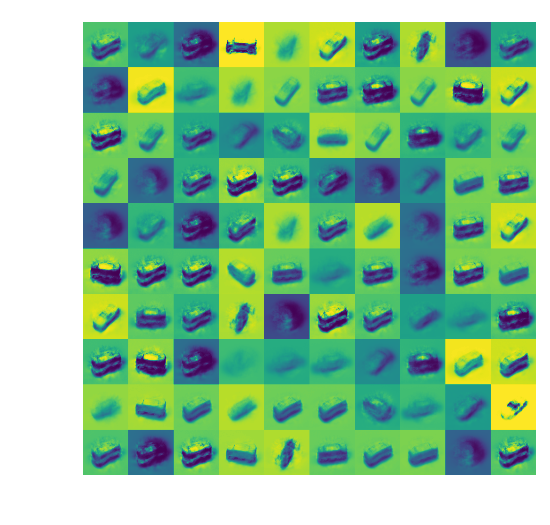

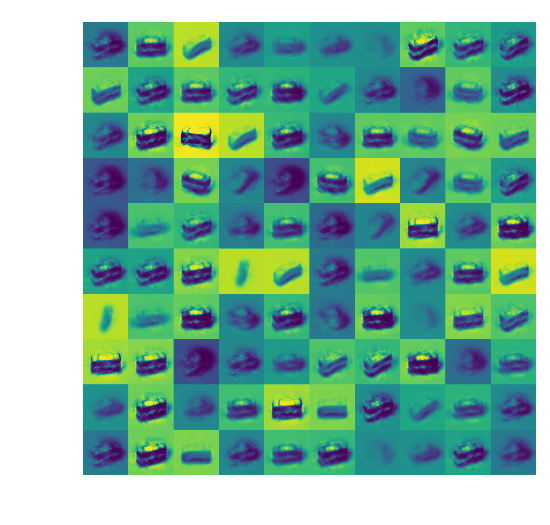

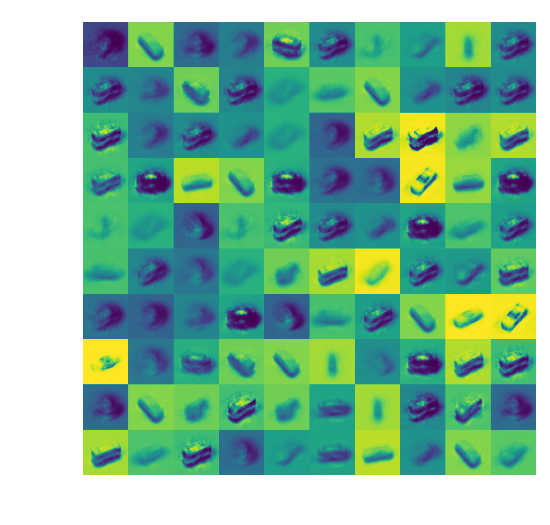

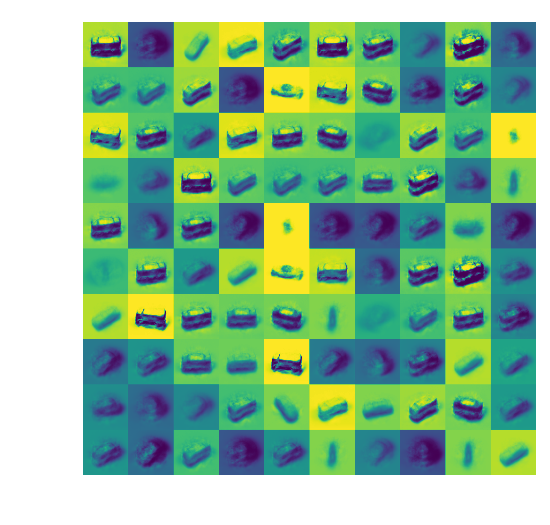

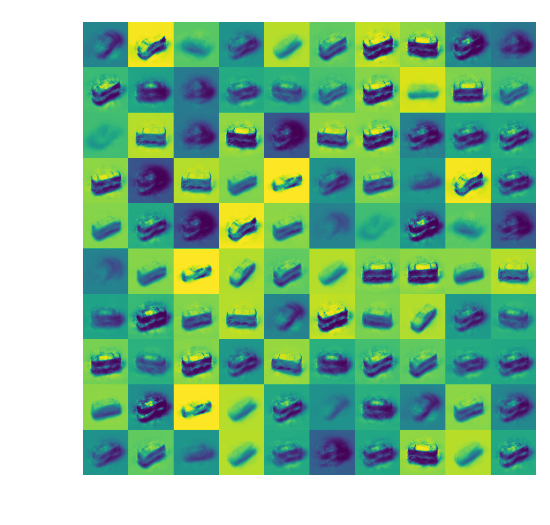

In [29]:
for _ in range(5):
    samples = ae.reconst_samples_out_data()
    scale = 10
    im = merge(samples, (10,10))
    fig_width = int(im.shape[0] * scale)
    fig_height = int(im.shape[1] * scale)
    im = resize(im, (fig_width, fig_height), anti_aliasing=True)
    plt.figure(dpi=150)
    plt.imshow(im)
    plt.axis('off')